# WhatsApp Chat Study
An investigation into a WhatsApp group chat by Jaume Clave.  

April 9th, 2020

### A Brief History of WhatsApp
WhatsApp is used daily by 1.5 billion people over 180 countries. The network and use of the app now extends past social use.  WhatsApp Business has been created by WhatsApp with the small business owner in mind and allows companies to safely and securely message their customers directly within the WhatsApp messaging platform. Facebook’s purchase of the messaging giant for $16 billion (4 billion cash, 12 billion in Facebook shares) back in 2014, further solidified Facebook’s reach into users everyday lives. The acquisition was one of the largest Silicon Valley had ever seen, and by far Facebooks largest purchase. So why did Facebook purchase an app that had limited revenue generation...? Growth potential and data. WhatsApp was the only app with higher engagement than Facebook itself. Here, Zuckerberg and co., saw and opportunity. In 2014, over 500 million people used WhatsApp monthly and the service __added more than 1 million users per day__. 70% of WhatsApp users were active daily, compared to Facebook’s 62%. Additionally, WhatsApp users sent 500 million pictures back and forth per day, about 150 million more than Facebook users. All these interactions are stored, saved and processed in Facebook servers deep underground where top of the line machine learning models churn out terabytes of processed chat data. Facebook ended the decade as the __owner of the top 4 most downloaded apps from 2010 to 2019__. Facebook, Messenger, WhatsApp and Instagram. Its reach is extensive and the data it has fuels everything it knows about us and you. 

### The Paper
I use WhatsApp, like many other people, to keep in touch with friends, share news and connect through groups. The messages my close friend group send on WhatsApp form part of the 29 million WhatsApp messages sent __every__ minute. I decided the rich textual data extracted from my group chat would be an interesting dataset for analysis, visualization and natural language processing.  

This paper uses Python to explore the dataset and compute metrics that the reader may find interesting. The paper aims to inform the reader about exploratory data analysis (EDA) methods what they can show in relation to this type of data. The paper tries to provide background into important forecasting models and techniques and it contains a brief introduction into machine learning through natural language processing and the use of a Naive Bayes classifier. The visualizations go hand in hand with the explanations so as to provide a visual medium for the information.

The last section of the paper contains links to articles and reports that I find useful and that provide a more detailed explanation of the topics this paper goes into. The section should be viewed as "further reading" if the reader is interested in learning more about the techniques, methods and models used here.

## Index
[Importing the Data](#Importing-the-Data)  
i. [The Dataset](#The-Dataset)  

[Exploratory Data Analysis](#Exploratory-Data-Analysis)  
i. [Daily Message Data](#Daily-Message-Data)  
ii. [Day of Week Data](#Day-of-Week-Data)  
iii. [Calendar Heat Map](#Calendar-Heat-Map)  
iv. [Hourly Activity on Chat](#Hourly-Activity-on-Chat) 

[Time Series Forecasting](#Time-Series-Forecasting)  
i. [STL Decomposition](#STL-Decomposition)  
ii. [Testing for a Stationary Time Series](#Testing-for-a-Stationary-Time-Series)  
iii. [The ARIMA Time Series Model](#The-ARIMA-Time-Series-Model)  
iv. [Fitting the ARIMA Time Series Model](#Fitting-the-ARIMA-Time-Series-Model)  
v. [Validating Forecasts](#Validating-Forecasts)  
vi. [Producing and Visualizing Forecasts](#Producing-and-Visualizing-Forecasts)

[Natural Language Processing (NLP)](#Natural-Language-Processing)  
i. [Chat Language](#Chat-Language)  
ii. [Sentiment Analysis and Polarity](#Sentiment-Analysis-and-Polarity)  
iii. [Sentiment Improvements](#Sentiment-Improvements)  
iv. [Sentiment: Rolling Mean](#Sentiment:-Rolling-Mean)  

[Categorizing Text using NLTK](#Categorizing-Text-using-NLTK)  
i. [NPS Chat Corpus](#NPS-Chat-Corpus)  
ii. [Machine Learning: Train/Test/Application](#Machine-Learning:-Train/Test/Application)  
iii. [Naive Bayes](#Naive-Bayes)

[Most Frequently Used Words](#Most-Frequently-Used-Words)  
i. [Word Cloud](#Word-Cloud)  
ii. [Most Swear Words](#Most-Swear-Words)  

[Emojis](#Emojis)  

[Next Steps](#Next-Steps)

[Further Reading](#Further-Reading)

In [109]:
## Center
from IPython.display import display, HTML

CSS = """
.output {
    align-items: center;
}
"""

HTML('<style>{}</style>'.format(CSS))

## Importing the Data
The first step of any project is to import the data and the packages that will be needed. The .txt file has been exported from a WhatsApp chat through the apps native "Export chat" option found when clicking into the chat > three dots > More. This .txt file is imported locally and manipulated to create a pandas dataframe with four columns; Date, Time, Name and Content.

In [104]:
## Import packages
import pandas as pd
import numpy as np 
import os
import emoji
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update(plt.rcParamsDefault)
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

In [3]:
## Impport chat file through read_file function
os.chdir(r'C:\Users\Jaume\Documents\Jaume Clave Domenech')

def read_file(file):
    '''Reads Whatsapp text file into a list of strings'''
    x = open(file,'r', encoding = 'utf-8') #Opens the text file into variable x but the variable cannot be explored yet
    y = x.read() #By now it becomes a huge chunk of string that we need to separate line by line
    content = y.splitlines() #The splitline method converts the chunk of string into a list of strings
    return content

chat = read_file('WhatsApp Chat with Expansion Crew.txt')

In [4]:
import datetime
# Remove elements that are not date
len(chat) #33563

for i in range(len(chat)):
  try:
    datetime.datetime.strptime(chat[i].split(',')[0], '%d/%m/%Y') #Converts string date into a date object
  except ValueError: #Returns an error if the string is not a datetime object
    chat[i-1] = chat[i-1] + ' ' + chat[i] #Appends the next line to the previous line
    chat[i] = "NA" #Replace the unwanted text element with 'NA'
    
#Handle more than double-line texting
for i in range(len(chat)):
  if chat[i].split(' ')[0] == 'NA':
    chat[i] = 'NA'
    
while True:
    try:
        chat.remove("NA")
    except ValueError:
        break
        
print(f'The length of the dataset is {len(chat)}')

The length of the dataset is 6872


In [5]:
date = [chat[i].split(',')[0] for i in range(len(chat))]

In [6]:
def startsWithDate(s):
    pattern = '^([0-2][0-9]|(3)[0-1])(\/)(((0)[0-9])|((1)[0-2]))(\/)(\d{2}|\d{4}), ([0-9][0-9]):([0-9][0-9]) -'
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [7]:
## Get time
time = [chat[i].split(',')[1].split('-')[0] for i in range(len(chat))]
time = [s.strip(' ') for s in time] # Remove spacing  

## Get name
name = [chat[i].split('-')[1].split(':')[0] for i in range(len(chat))]

In [8]:
## Get content
content = []
for i in range(len(chat)):
  try:
    content.append(chat[i].split(':')[2])
  except IndexError:
    content.append('Missing Text')

In [9]:
## Create datframe and apply names to columns
df = pd.DataFrame(list(zip(date, time, name, content)), columns = ['Date', 'Time', 'Name', 'Content'])
df

,Date,Time,Name,Content
0,01/04/2019,22:41,Messages to this group are now secured with end,Missing Text
1,27/02/2019,19:27,"Marc Pamias created group ""Expansion Crew""",Missing Text
2,01/04/2019,22:41,Marc Pamias added you,Missing Text
3,01/04/2019,22:41,Marc Pamias,Eiou
4,01/04/2019,22:41,Jaume Clave,Bahahahahahahha expansion 😂 cracks
...,...,...,...,...
6867,31/03/2020,15:37,Alvaro Iranzo,Os cunde jugar?
6868,31/03/2020,15:38,Marc Pamias,Que no veqs
6869,31/03/2020,15:38,Alvaro Iranzo,Pero molaria mas que cada dia envie foto uno
6870,31/03/2020,15:38,Alvaro Iranzo,Y asi todos participamos


In [10]:
df_lang = df.copy()

### The Dataset
The dataset consists of a WhatsApp chat group including 7 members. The chat was originally created for making plans to meet while we were all in Barcelona over Christmas. It has developed into the primary form of group conversation between all the members. If anything needs to be talked about or shared, it's done on this group.

The group was created on January 4th, 2019 and contains 6865 text based messages.

In [11]:
## DataFrame containing only text messages
messages_df = df[df['Content'] != "Missing Text"]
print(f'The messages dataframe contains {messages_df.shape[0]} rows and {messages_df.shape[1]} columns.' '\n'
      f'This corresponds to {messages_df.shape[0]} texts. Each text in the dataframe has the following attributes; \n' 
      'the date sent, the time sent, the sender name and the text content.')

The messages dataframe contains 6865 rows and 4 columns.
This corresponds to 6865 texts. Each text in the dataframe has the following attributes; 
the date sent, the time sent, the sender name and the text content.


In order to get a feel of the data and what we have to work with, it is important to use visualization to explore simple aspects of the dataset. The visualization below displays the total text messages sent by each group member for the entirety of the group chat. A horizontal bar chart has been select to display this data as this type of plot is best for displaying comparisons between categories (group members) of the data since the brain and eyes are best trained to differentiate horizontal length.

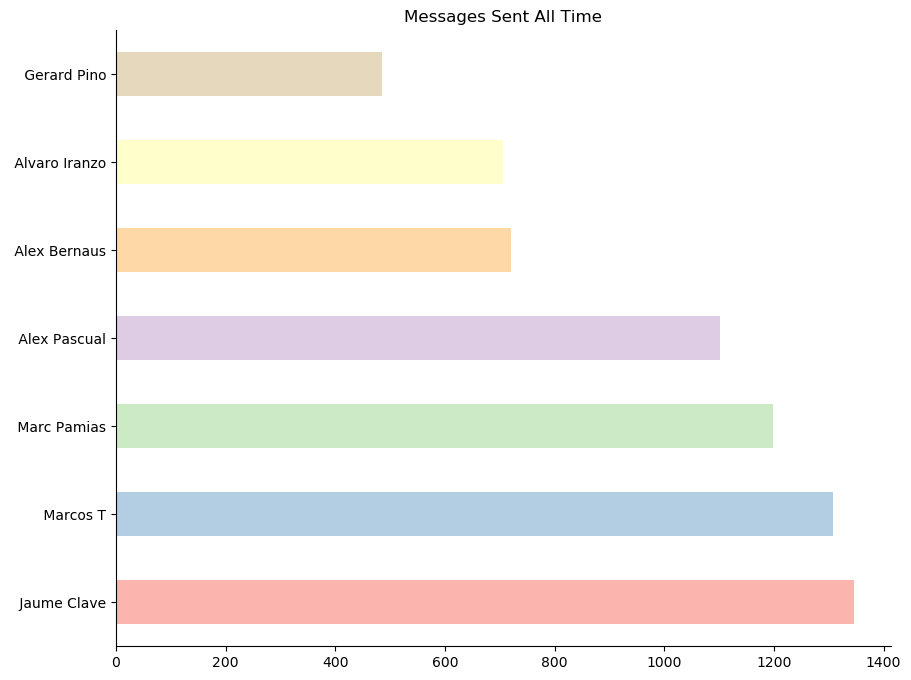

In [12]:
## Most talkative bar plot
person_counts = messages_df['Name'].value_counts()
plt.figure(figsize = (10, 8))
person_counts.plot.barh(color=['#fbb4ae', '#b3cde3', '#ccebc5', '#decbe4', '#fed9a6', '#ffffcc', '#e5d8bd'])
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.title('Messages Sent All Time')
plt.show()

The next step is to take the dataframe and create new columns from the original ones in order to extract new information. The code below creates a count for the total letters used in each message, a count for the total words a message contains and it creates date fields that will be used later on for further analysis.

In [13]:
## Letter, word count, day, hour, minute, weekday
messages_df['Letter_Count'] = messages_df['Content'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Content'].apply(lambda s : len(s.split(' ')) - 1)
messages_df['Date'] = pd.to_datetime(messages_df['Date'])
messages_df['Day_of_Week'] = messages_df['Date'].dt.dayofweek 
messages_df['Year'] = messages_df['Date'].dt.year
messages_df['Month'] = messages_df['Date'].dt.month
#messages_df['Day_of_Week'] = messages_df['Date'].dt.weekday_name
messages_df['Time'] = pd.to_datetime(messages_df['Time'])
messages_df['Hour'] = messages_df['Time'].dt.hour
messages_df['Day'] = messages_df['Date'].dt.day
messages_df['Date2.0'] = messages_df['Day'].astype(str) + '-' + messages_df['Month'].astype(str) + '-' + messages_df['Year'].astype(str)
messages_df.head(5)

,Date,Time,Name,Content,Letter_Count,Word_Count,Day_of_Week,Year,Month,Hour,Day,Date2.0
3,2019-01-04,2020-04-09 22:41:00,Marc Pamias,Eiou,5,1,4,2019,1,22,4,4-1-2019
4,2019-01-04,2020-04-09 22:41:00,Jaume Clave,Bahahahahahahha expansion 😂 cracks,35,4,4,2019,1,22,4,4-1-2019
5,2019-01-04,2020-04-09 22:41:00,Marc Pamias,Pongo casa este finde,22,4,4,2019,1,22,4,4-1-2019
6,2019-01-04,2020-04-09 22:42:00,Jaume Clave,Yo tendré que read up on my strategy,37,8,4,2019,1,22,4,4-1-2019
7,2019-01-04,2020-04-09 22:42:00,Marc Pamias,Que os va mejor a todos,24,6,4,2019,1,22,4,4-1-2019


## Exploratory Data Analysis
Before going further it is important to generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution.

Looking at the "unique" row for discrete_columns it is found that the group has texted on 207 days of the 453 days since the group was created (46% of the time). 85% of all the messages sent through the group are unique.  

In [14]:
## Discreate and Continous columns
discrete_columns = ['Date', 'Time', 'Name', 'Content']
messages_df[discrete_columns].describe()

,Date,Time,Name,Content
count,6865,6865,6865,6865
unique,207,1007,7,5862
top,2020-03-26 00:00:00,2020-04-09 22:56:00,Jaume Clave,<Media omitted>
freq,219,27,1346,403
first,2019-01-04 00:00:00,2020-04-09 00:01:00,NaN,NaN
last,2020-12-03 00:00:00,2020-04-09 23:58:00,NaN,NaN


The mean letter count in each message is just over 26 letters while the mean words in each message are 5. The median of the word count is 4, this denotes the value lying at the midpoint of a frequency distribution of observed values, such that there is an equal probability of a message containing more than 4 words (falling above) or less than 4 words (below it).

The longest message contained 56 words with nearly 300 letters.

In [15]:
## Continous columns
continuous_columns = ['Letter_Count', 'Word_Count']
messages_df[continuous_columns].describe()

,Letter_Count,Word_Count
count,6865.000000,6865.000000
mean,26.129206,4.996504
std,22.383720,4.458170
min,1.000000,1.000000
25%,12.000000,2.000000
50%,20.000000,4.000000
75%,34.000000,7.000000
max,298.000000,56.000000


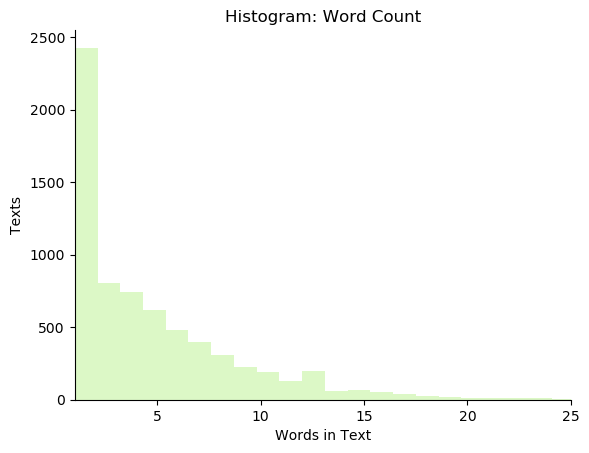

In [16]:
## Histogram
x = messages_df['Word_Count']
plt.hist(x, bins = 50, color = '#DCF8C6')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.title('Histogram: Word Count')
plt.xlabel('Words in Text')
plt.ylabel('Texts')
plt.xlim(1, 25)
plt.show()

### Daily Message Data
The group has been used to chat on 46% of all possible days. This can be visualised to gain a better understanding of what days and parts of the month and year lead the most amount of activity.

There seems to be a concentration of messages in the summer months of 2019 and mid-to-late March, 2020. It is worth noting that there is a trend in uptick of messages as the group has matured. The first three months from creation really lackced constant communication while it seems that the first three months of this year have significantly more messages sent than the first three months of 2019.  

In [17]:
## Filling days with 0 messages into time series
dms = messages_df.groupby(['Date']).count()['Content']
idx = pd.date_range('2019-01-4', '2020-03-31')
dms.index = pd.DatetimeIndex(dms.index)
daily_messages = dms.reindex(idx, fill_value = 0)

In [18]:
## Create dataframe containing msg count = 0 for days with no message
daily_messages_df = pd.DataFrame(daily_messages)
daily_messages_df2 = daily_messages_df.reset_index()
daily_messages_df2.columns = ['date', 'msg']

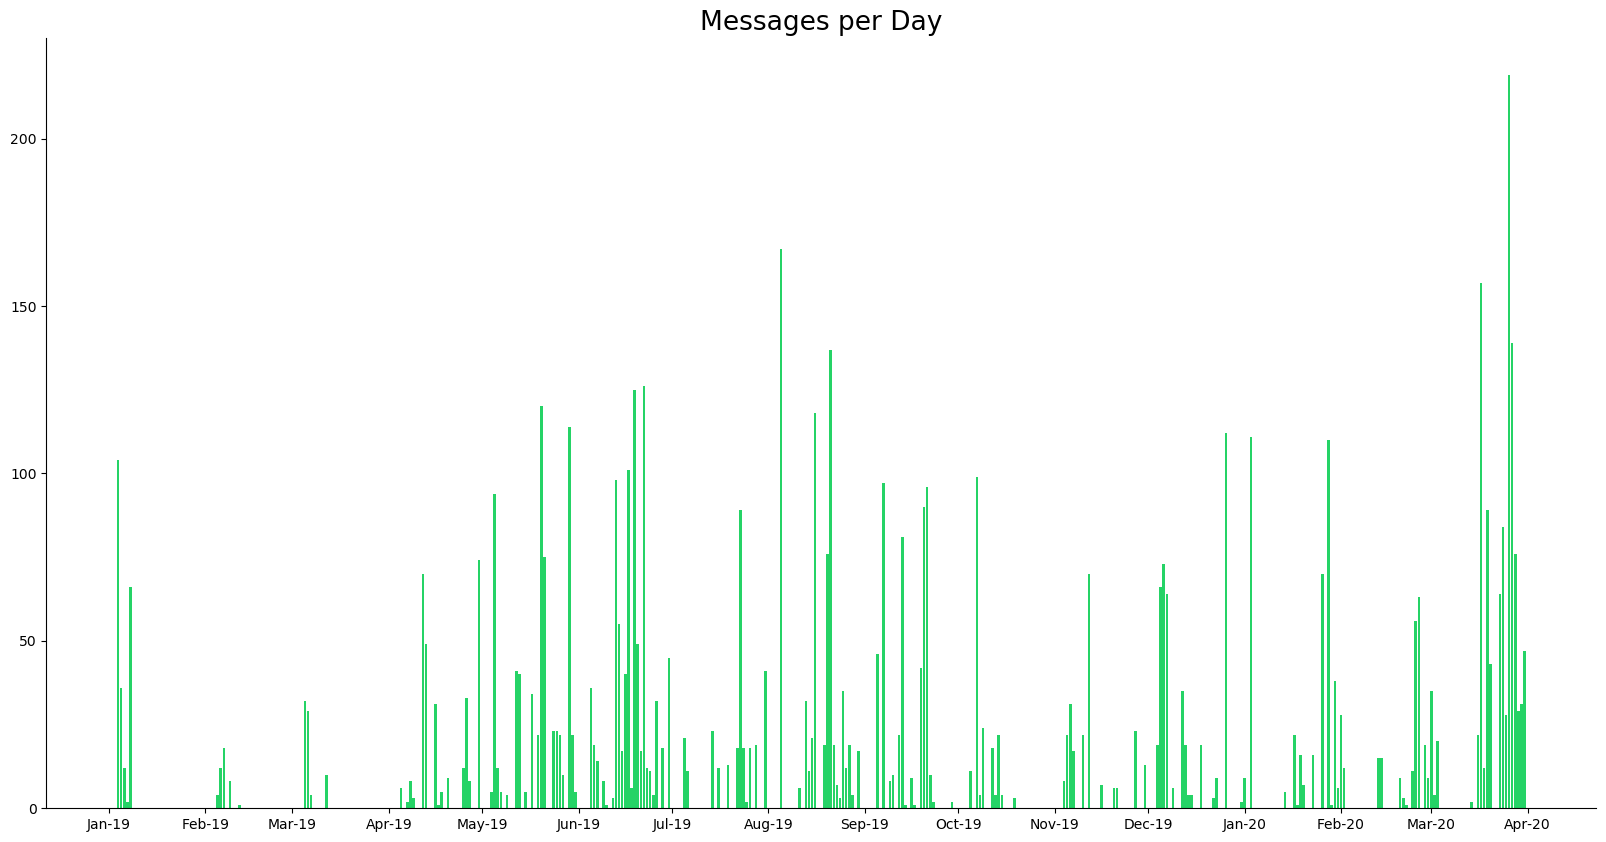

In [19]:
import matplotlib.dates as mdates
## Messages per Day
locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b-%y')

plt.figure(figsize = (20,10))
plt.bar(daily_messages_df2['date'], daily_messages_df2['msg'], color = '#25D366')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.title('Messages per Day', size = 19)
plt.show()

### Day of Week Data
A box plot—displays the five-number summary of a set of data. The five-number summary is the minimum, first quartile, median, third quartile, and maximum.

1. Minimum Score: The lowest score, excluding outliers (shown at the end of the left whisker)
2. Lower Quartile: Twenty-five percent of scores fall below the lower quartile value (also known as the first quartile).
3. Median: The median marks the mid-point of the data and is shown by the line that divides the box into two parts (sometimes known as the second quartile). Half the scores are greater than or equal to this value and half are less.
4. Upper Quartile: Seventy-five percent of the scores fall below the upper quartile value (also known as the third quartile). Thus, 25% of data are above this value.
5. Maximum Score: The highest score, excluding outliers (shown at the end of the right whisker).

It seems that all days have a positive skew... that is, the median is closer to the bottom of the box, the whisker is shorter on the lower end of the box, and thus the distribution is skewed right. The mean and median will be greater than the mode in this case.

In [20]:
## Create Dataframe neede for boxplot
daily_messages_df3 = daily_messages_df2.copy()
daily_messages_df3['day_of_week'] = daily_messages_df3['date'].dt.dayofweek
daily_messages_df3 = daily_messages_df3[daily_messages_df3['msg'] != 0]

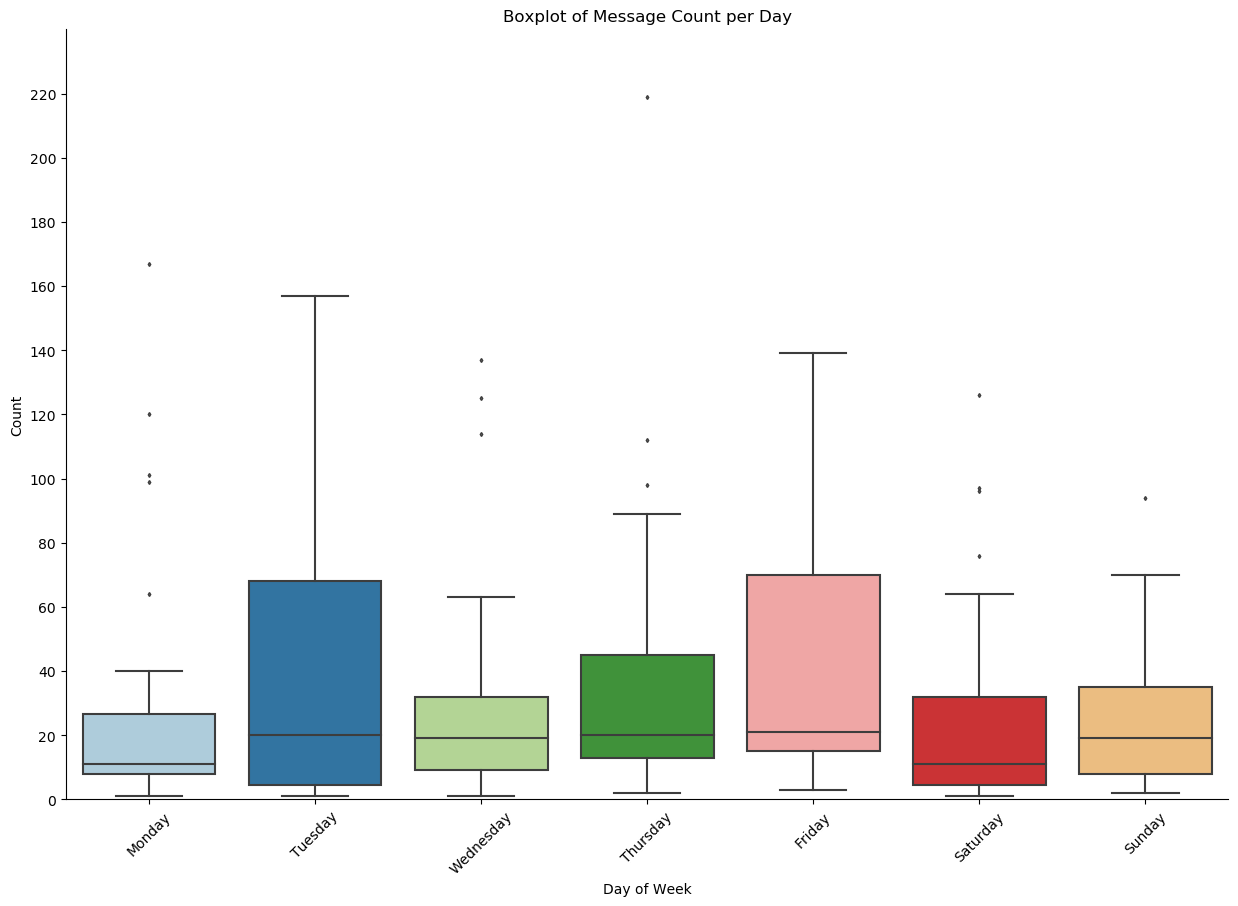

In [21]:
## Box plot of messages per day
import seaborn as sns
plt.figure(figsize = (15, 10))
my_pal = {0 : '#a6cee3', 1 : '#1f78b4', 2 :'#b2df8a', 3 : '#33a02c', 
          4 : '#fb9a99', 5 : '#e31a1c', 6 : '#fdbf6f'}

ax = sns.boxplot(
    x='day_of_week', y='msg', data=daily_messages_df3, flierprops = dict(markerfacecolor = '0.50', markersize = 2), 
    palette=my_pal)
ax.set_ylim([0, 240]) 
plt.xticks(rotation=70)
plt.yticks(np.arange(0, 240, step = 20))
plt.title('Boxplot of Message Count per Day')
plt.xlabel('Day of Week')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation = 45)
plt.ylabel('Count')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.show()

A bar plot shows the total count of messages per day of week.

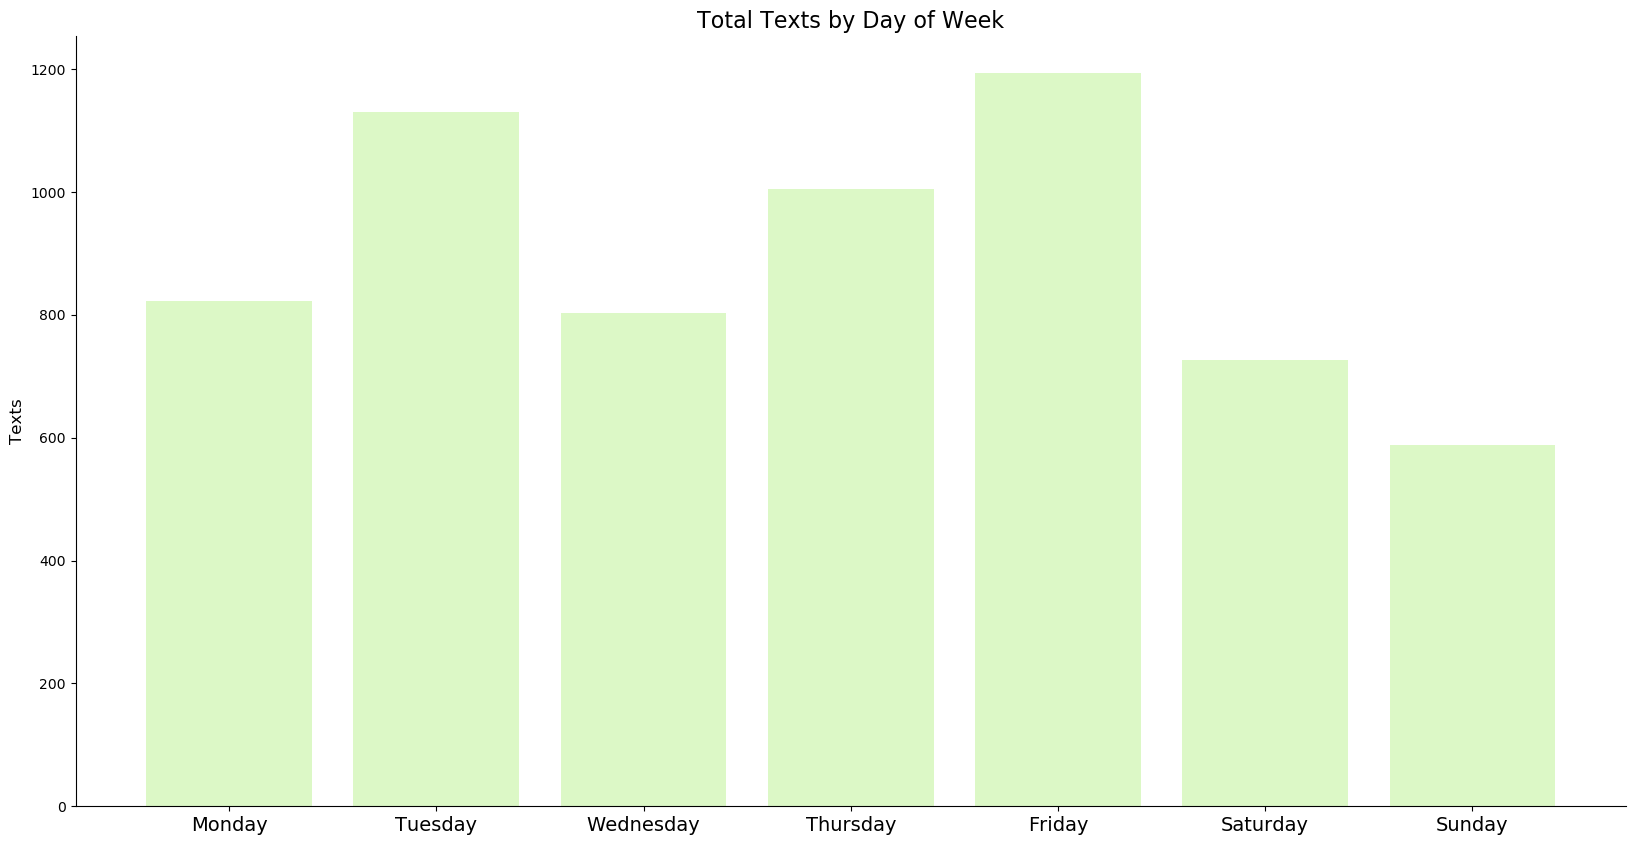

In [22]:
dm4 = daily_messages_df3.groupby('day_of_week').sum()
dm4 = dm4.reset_index()

plt.figure(figsize = (20,10))
plt.bar(dm4['day_of_week'], dm4['msg'], color = '#DCF8C6')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.title('Total Texts by Day of Week', fontsize = 16)
plt.xlabel('')
plt.ylabel('Texts', fontsize = 12)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fontsize = 14)
plt.show()

### Calendar Heat Map
Calendar heat map is a variation of a traditional heat map where data is laid-out on Calendar (typically month on column and weekdays on row, every data point being a date) and color encoding is depicted using metric of interest which varies by day. This is utilized to quickly see which are the "hot" days, the days with most group conversation throughout the groups history.

The data needs to be represented in a yearly structure. A heat map is created for 2019 and another heat map is created for 2020. These two heat maps are then merged in the same image. The amount of text messages per day, must be normalized in order to optimize the color coding of the map. 

Each data point is normalized between 0 and 1, where 0 corresponds to a day with no messages and a score of 1 indicates the day with the most messages in the entire dataset. This is done by subtracting each datapoint by the minimum value in the dataset and dividing that value by the difference between the maximum values subtracted by the minimum value. Each data point is normalized by the following calculation:

<img src = "https://wikimedia.org/api/rest_v1/media/math/render/svg/0222c9472478eec2857b8bcbfa4148ece4a11b84"/>

Where $X'$ is the scaled datapoint $(X)$.

In [23]:
## Function to create calendar heatmap
from matplotlib.patches import Polygon
from datetime import datetime
from dateutil.relativedelta import relativedelta


def calmaps_cb(ax, year, data):
    ax.tick_params('x', length=0, labelsize="medium", which='major')
    ax.tick_params('y', length=0, labelsize="x-small", which='major')

    # Month borders
    xticks, labels = [], []
    start = datetime(year,1,1).weekday()
    for month in range(1,13):
        first = datetime(year, month, 1)
        last = first + relativedelta(months=1, days=-1)

        y0 = first.weekday()
        y1 = last.weekday()
        x0 = (int(first.strftime("%j"))+start-1)//7
        x1 = (int(last.strftime("%j"))+start-1)//7

        P = [ (x0,   y0), (x0,    7),  (x1,   7),
              (x1,   y1+1), (x1+1,  y1+1), (x1+1, 0),
              (x0+1,  0), (x0+1,  y0) ]
        xticks.append(x0 +(x1-x0+1)/2)
        labels.append(first.strftime("%b"))
        poly = Polygon(P, edgecolor="black", facecolor="None",
                       linewidth=1, zorder=20, clip_on=False)
        ax.add_artist(poly)
    
    ax.set_xticks(xticks)
    ax.set_xticklabels(labels)
    ax.set_yticks(0.5 + np.arange(7))
    ax.set_yticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
    ax.set_title("{}".format(year), weight="semibold")
    
    # Clearing first and last day from the data
    valid = datetime(year, 1, 1).weekday()
    data[:valid,0] = np.nan
    valid = datetime(year, 12, 31).weekday()
    # data[:,x1+1:] = np.nan
    data[valid+1:,x1] = np.nan

    # Showing data
    im = ax.imshow(data, extent=[0,53,0,7], zorder=10, vmin=0, vmax=1,
              cmap="RdYlBu_r", origin="lower", alpha=.75)
    fig.colorbar(im)

def calmaps(ax, year, data):
    ax.tick_params('x', length=0, labelsize="medium", which='major')
    ax.tick_params('y', length=0, labelsize="x-small", which='major')

    # Month borders
    xticks, labels = [], []
    start = datetime(year,1,1).weekday()
    for month in range(1,13):
        first = datetime(year, month, 1)
        last = first + relativedelta(months=1, days=-1)

        y0 = first.weekday()
        y1 = last.weekday()
        x0 = (int(first.strftime("%j"))+start-1)//7
        x1 = (int(last.strftime("%j"))+start-1)//7

        P = [ (x0,   y0), (x0,    7),  (x1,   7),
              (x1,   y1+1), (x1+1,  y1+1), (x1+1, 0),
              (x0+1,  0), (x0+1,  y0) ]
        xticks.append(x0 +(x1-x0+1)/2)
        labels.append(first.strftime("%b"))
        poly = Polygon(P, edgecolor="black", facecolor="None",
                       linewidth=1, zorder=20, clip_on=False)
        ax.add_artist(poly)
    
    ax.set_xticks(xticks)
    ax.set_xticklabels(labels)
    ax.set_yticks(0.5 + np.arange(7))
    ax.set_yticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
    ax.set_title("{}".format(year), weight="semibold")
    
    # Clearing first and last day from the data
    valid = datetime(year, 1, 1).weekday()
    data[:valid,0] = np.nan
    valid = datetime(year, 12, 31).weekday()
    # data[:,x1+1:] = np.nan
    data[valid+1:,x1] = np.nan

    # Showing data
    im = ax.imshow(data, extent=[0,53,0,7], zorder=10, vmin=0, vmax=1,
              cmap="RdYlBu_r", origin="lower", alpha=.75)
    #fig.colorbar(im)

In [24]:
## Creating 2019 and 2020 numpy arrays
## Filling days with 0 messages into time series

## 2019
dms = messages_df.groupby(['Date']).count()['Content']
idx = pd.date_range('2018-12-31', '2020-01-05')
dms.index = pd.DatetimeIndex(dms.index)
daily_messages_2019 = dms.reindex(idx, fill_value = 0)
daily_messages_df_2019 = pd.DataFrame(daily_messages_2019)
daily_messages_df2_2019 = daily_messages_df_2019.reset_index()
daily_messages_df2_2019.columns = ['date', 'msg']
daily_messages_df2_2019.loc[daily_messages_df2_2019['date'] == '2018-12-31', 'msg'] = np.nan
daily_messages_df2_2019.loc[daily_messages_df2_2019['date'] == '2019-01-01', 'msg'] = np.nan
daily_messages_df2_2019.loc[daily_messages_df2_2019['date'] == '2019-01-02', 'msg'] = np.nan
daily_messages_df2_2019.loc[daily_messages_df2_2019['date'] == '2019-01-03', 'msg'] = np.nan
daily_messages_df2_2019.loc[daily_messages_df2_2019['date'] == '2020-01-01', 'msg'] = np.nan
daily_messages_df2_2019.loc[daily_messages_df2_2019['date'] == '2020-01-02', 'msg'] = np.nan
daily_messages_df2_2019.loc[daily_messages_df2_2019['date'] == '2020-01-03', 'msg'] = np.nan
daily_messages_df2_2019.loc[daily_messages_df2_2019['date'] == '2020-01-04', 'msg'] = np.nan
daily_messages_df2_2019.loc[daily_messages_df2_2019['date'] == '2020-01-05', 'msg'] = np.nan
x_2019 = daily_messages_df2_2019['msg'].to_numpy()

## 2020
dms = messages_df.groupby(['Date']).count()['Content']
idx = pd.date_range('2019-12-31', '2021-01-04')
dms.index = pd.DatetimeIndex(dms.index)
daily_messages_2020 = dms.reindex(idx, fill_value = 0)
daily_messages_df_2020 = pd.DataFrame(daily_messages_2020)
daily_messages_df2_2020 = daily_messages_df_2020.reset_index()
daily_messages_df2_2020.columns = ['date', 'msg']
daily_messages_df2_2020.loc[daily_messages_df2_2020['date'] == '2019-12-31', 'msg'] = np.nan
daily_messages_df2_2020.loc[daily_messages_df2_2020['date'] >= '2020-04-01', 'msg'] = np.nan
daily_messages_df2_2020.loc[daily_messages_df2_2020['date'] == '2021-01-01', 'msg'] = np.nan
daily_messages_df2_2020.loc[daily_messages_df2_2020['date'] == '2021-01-02', 'msg'] = np.nan
daily_messages_df2_2020.loc[daily_messages_df2_2020['date'] == '2021-01-03', 'msg'] = np.nan
daily_messages_df2_2020.loc[daily_messages_df2_2020['date'] == '2021-01-04', 'msg'] = np.nan
daily_messages_df2_2020.loc[daily_messages_df2_2020['date'] == '2021-01-05', 'msg'] = np.nan
x_2020 = daily_messages_df2_2020['msg'].to_numpy()

In [25]:
## Normalize Data
## 2019
daily_messages_df2_2019['msg']=(daily_messages_df2_2019['msg']-daily_messages_df2_2019['msg'].min())/(daily_messages_df2_2019['msg'].max()-daily_messages_df2_2019['msg'].min())
x_2019 = daily_messages_df2_2019['msg'].to_numpy()
I_19 = x_2019

## 2020
daily_messages_df2_2020['msg']=(daily_messages_df2_2020['msg']-daily_messages_df2_2020['msg'].min())/(daily_messages_df2_2020['msg'].max()-daily_messages_df2_2020['msg'].min())
x_2020 = daily_messages_df2_2020['msg'].to_numpy()
I_20 = x_2020

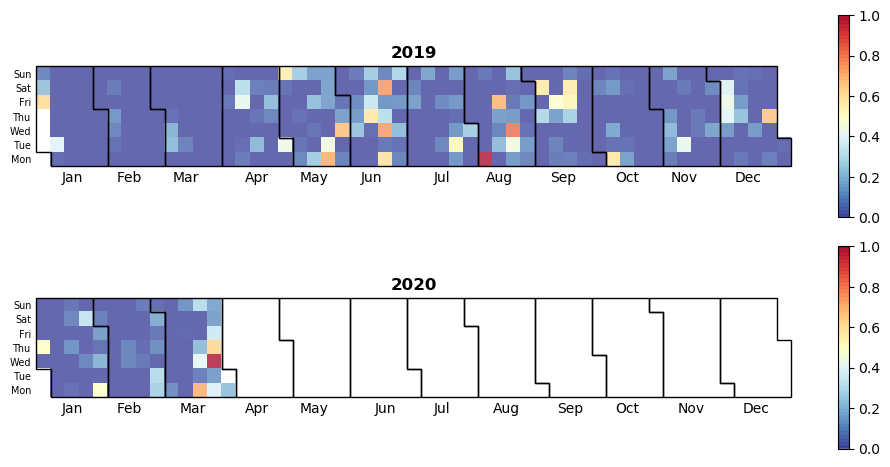

In [26]:
## Plotting the heatmap
fig = plt.figure(figsize=(10, 7), dpi=100)

## 2019
ax = plt.subplot(311, xlim=[0,53], ylim=[0,7], frameon=False, aspect=1)
I_19 = x_2019
calmaps_cb(ax, 2019, I_19.reshape(53,7).T)

## 2020
ax = plt.subplot(312, xlim=[0,53], ylim=[0,7], frameon=False, aspect=1)
I_20 = x_2020
calmaps_cb(ax, 2020, I_20.reshape(53,7).T)

plt.tight_layout()
plt.savefig("calendar-heatmap.png", dpi=300)
plt.savefig("calendar-heatmap.pdf", dpi=600)
plt.show()

A bar chart can be created to further help understand which days have had the most conversation.

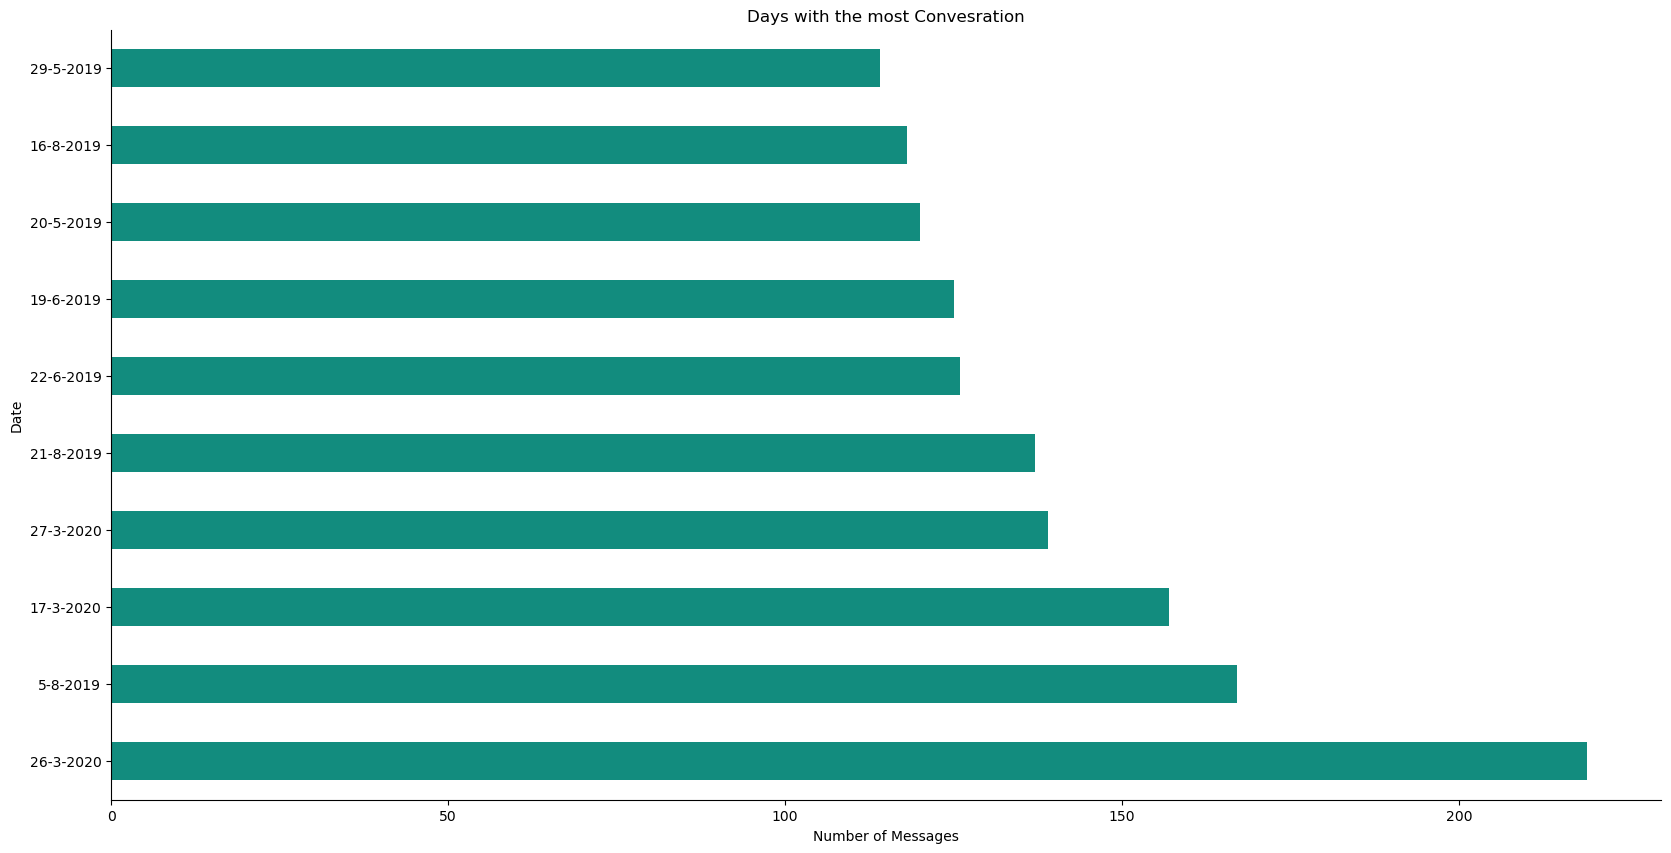

In [27]:
## Top 10 Dates on which the most number of messages were sent
plt.figure(figsize = (20,10))
messages_df['Date2.0'].value_counts().head(10).plot.barh(color = '#128C7E') 
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.xlabel('Number of Messages')
plt.title('Days with the most Convesration')
plt.ylabel('Date')
plt.show()

### Hourly Activity on Chat
The next step is to find and visualize which hours of the day the group seems to be most active. This is initially done through a bar plot which counts the total amount of messages in each of the 24 hours for the entire history of the chat. The second visualization is more advanced in that it plots the frequency of texts on each hour of each day of the week.

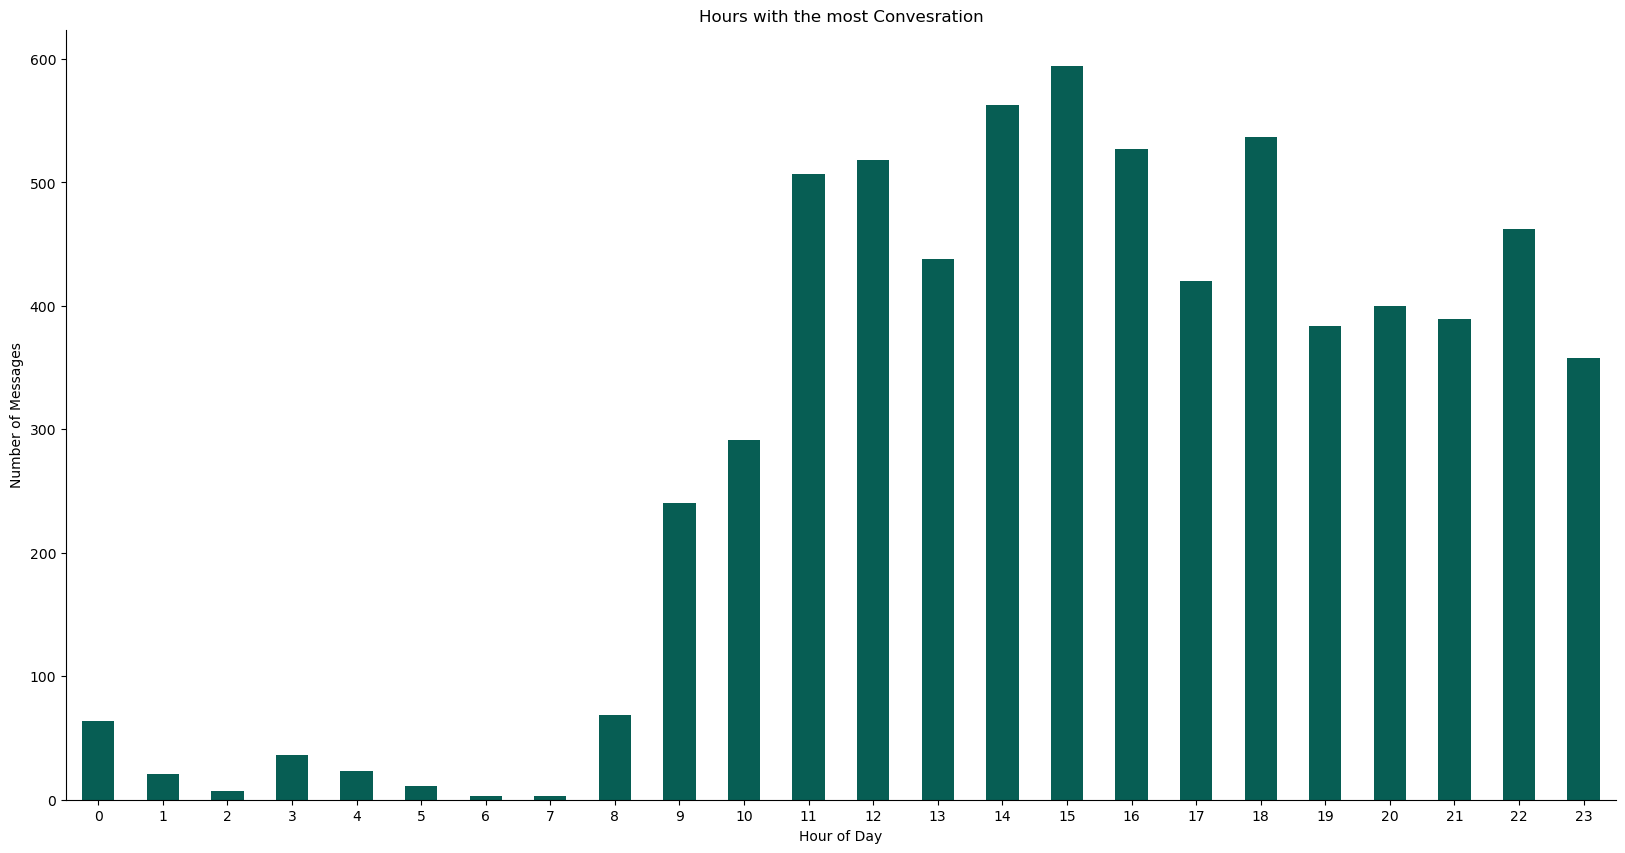

In [28]:
## Top 10 Hours of the day during which the most number of messages were sent
plt.figure(figsize = (20,10))
messages_df['Hour'].value_counts().sort_index().plot.bar(color = '#075E54') 
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.xticks(rotation = 0)
plt.xlabel('Hour of Day')
plt.title('Hours with the most Convesration')
plt.ylabel('Number of Messages')
plt.show()

In [29]:
## RE-IMPORTING FOR NLTK
# read in the whatsapp txt file (unzipped and placed in data directory)
## Here I've done a find and replace all for the peoples names
with open(r'C:\Users\Jaume\Documents\Jaume Clave Domenech\WhatsApp Chat with Expansion Crew.txt', encoding = "utf8") as f:
    content = f.readlines()

content = [x.strip() for x in content]

In [30]:
## Add needed brackets to content in order to process
content_f = []

for message in range(len(content)):
    a = content[message]
    b = '[' + a
    c = b[:18] + ']' + b[18:]
    d = c[:19] + c[21:]
    content_f.append(d)

In [31]:
## Seperate Dates
dates=[]
for line in content_f:
    try:
        dates.append(line.split('[')[1].split(']')[0])
    except:
        #print(line)   # examine the line that can't be read
        # print('oops')
        pass

In [32]:
## Seperate into Date and Time
date=[]
time=[]
for item in dates:
    try:
        date.append(item.split(',')[0])
        time.append(item.split(',')[1])
    except:
        pass

In [33]:
## Create DF
df1 = pd.DataFrame(dates, columns =['dtm'])
len(df1)

6960

In [34]:
## Remove non-date/times
df1 = df1[df1['dtm'].str.len() == 17]
df1 = df1[df1['dtm'] != 'https://open.spot']
df1 = df1[df1['dtm'] != 'Lakers: _Trades h']
df1 = df1[df1['dtm'] != 'Tobias Harris: kn']
df1 = df1[df1['dtm'] != 'D Russell: wolves']
df1 = df1[df1['dtm'] != 'via @ESPN App htt']
df1 = df1[df1['dtm'] != 'items at fast-foo']
df1 = df1[df1['dtm'] != 'Pennsylvania. The']
df1 = df1[df1['dtm'] != 'concentration of ']
df1 = df1[df1['dtm'] != 'Ha perdido la de ']
df1 = df1[df1['dtm'] != '2) child=niño (ne']
df1 = df1[df1['dtm'] != 'https://www.insta']
df1 = df1[df1['dtm'] != 'Primero q deberia']
df1 = df1[df1['dtm'] != 'Case, Dead, Deadl']
df1['dtm'] = pd.to_datetime(df1['dtm'])
df_time = df1
df_time

,dtm
0,2019-01-04 22:41:00
1,2019-02-27 19:27:00
2,2019-01-04 22:41:00
3,2019-01-04 22:41:00
4,2019-01-04 22:41:00
...,...
6955,2020-03-31 15:37:00
6956,2020-03-31 15:38:00
6957,2020-03-31 15:38:00
6958,2020-03-31 15:38:00


In [35]:
## Transformations to df_time dataframe
df_time['float_time'] = df_time['dtm'].dt.hour + df_time['dtm'].dt.minute / 60.0
df_time['year_month'] = df_time['dtm'].dt.to_period('M')
df_time['day'] = df_time['dtm'].dt.day_name()
df_time['day_num'] = df_time['dtm'].dt.dayofweek
df_time = df_time.sort_values('day_num')
df_time['freq'] = df_time.groupby('day')['day'].transform('count')
df_time

,dtm,float_time,year_month,day,day_num,freq
711,2019-08-05 12:53:00,12.883333,2019-08,Monday,0,893
723,2019-08-05 16:38:00,16.633333,2019-08,Monday,0,893
724,2019-08-05 16:38:00,16.633333,2019-08,Monday,0,893
725,2019-08-05 16:38:00,16.633333,2019-08,Monday,0,893
726,2019-08-05 16:38:00,16.633333,2019-08,Monday,0,893
...,...,...,...,...,...,...
519,2019-05-05 17:52:00,17.866667,2019-05,Sunday,6,607
518,2019-05-05 17:52:00,17.866667,2019-05,Sunday,6,607
517,2019-05-05 17:52:00,17.866667,2019-05,Sunday,6,607
529,2019-05-05 19:00:00,19.000000,2019-05,Sunday,6,607


In [36]:
## Create Palette of days
pal = sns.cubehelix_palette(7, rot=-.4, light=0.9, dark = 0.1)
days_freq = list(df_time['day'].value_counts().index)

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
lst = list(zip(days, pal[::-1]))

In [37]:
## Assign days to color palette
pal_reorder=[]

for i in days:
    #print(i)
    j=0
    for day in days_freq:
        
        if i == day:
            #print(lst[j][1])
            pal_reorder.append(lst[j][1])
        j+=1

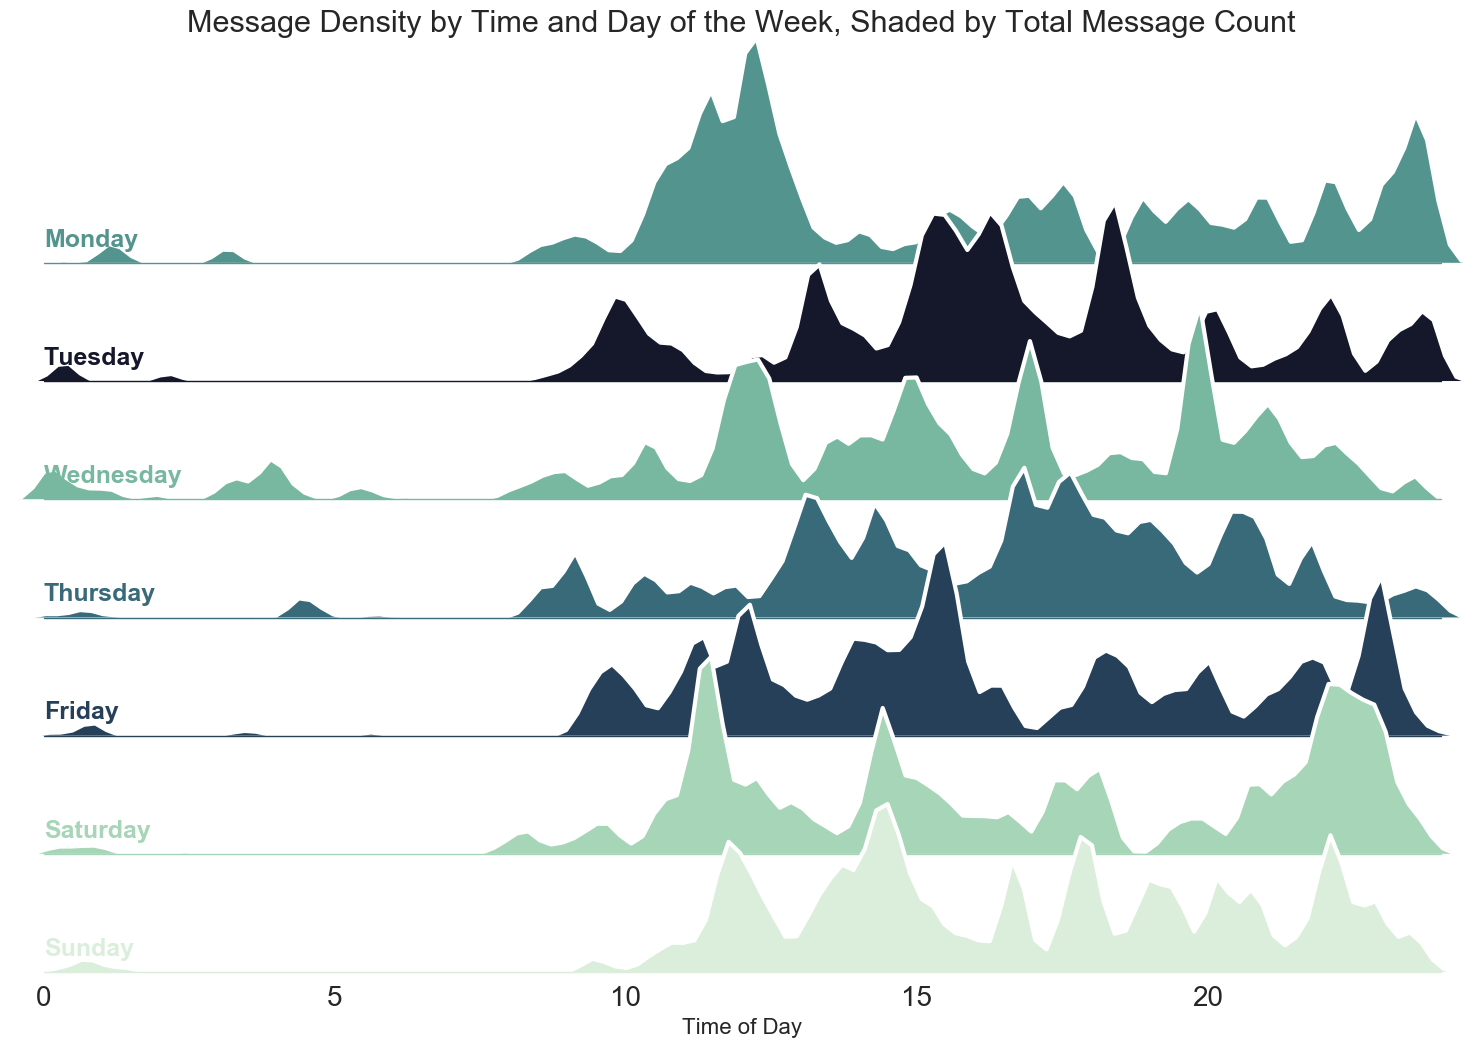

In [110]:
## Plot
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)}, palette = 'BuGn_r')
pal = sns.cubehelix_palette(7, light=1, as_cmap=True)
g = sns.FacetGrid(df_time[(df_time.float_time > 0)], row="day", hue="day",   # change "day" to year_month if required
                  aspect=10, size=1.5, palette=pal_reorder, xlim=(0,24))

# Draw the densities in a few steps
g.map(sns.kdeplot, "float_time", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "float_time", clip_on=False, color="w", lw=3, bw=.2)
g.map(plt.axhline, y=0, lw=1, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, 0.1, label, fontweight="bold", color=color, 
            ha="left", va="center", transform=ax.transAxes, size=18)

g.map(label, "float_time")

g.set_xlabels('Time of Day', fontsize=16)
g.set_xticklabels(fontsize=20)
# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-0.5)
g.fig.suptitle('Message Density by Time and Day of the Week, Shaded by Total Message Count', fontsize=22)   
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)
plt.show()
#g.savefig('plots/message_density_day.png')   # uncomment to save

## Time Series Forecasting
A time series is a series of data points indexed in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. This dataset can thus be transformed into a time series with days on the x-axis and message count (or other measures) on the y-axis.

Time series analysis involves developing models that best capture or describe an observed time series in order to understand the underlying causes. This field of study seeks the “why” behind a time series dataset. This often involves making assumptions about the form of the data and decomposing the time series into constitution components. This section outlines this entire process and provides a forecast for daily messages past the last date in the dataset (31/03/2020).

Time series adds an explicit order dependence between observations: a time dimension. This additional dimension is both a constraint and a structure that provides a source of additional information. The quality of a descriptive model is determined by how well it describes all available data and the interpretation it provides to better inform the problem domain.

Forecasting involves taking models fit on historical data and using them to predict future observations. An important distinction in forecasting is that the future is completely unavailable and must only be estimated from what has already happened. This is explored below. In order to create the time series a pandas series is formed from the data:

In [39]:
## Create time series with date as index and messsage count in column
daily_messages_df2.head(10)
dts = daily_messages_df2.set_index('date')
ts = dts['msg']
ts.head(10)

date
2019-01-04    104
2019-01-05     36
2019-01-06     12
2019-01-07      2
2019-01-08     66
2019-01-09      0
2019-01-10      0
2019-01-11      0
2019-01-12      0
2019-01-13      0
Name: msg, dtype: int64

### STL Decomposition
The best way to see if there are any seasonal, cyclical or trends in the time series the data must be visualized. This is completed using STL decomposition. STL is a versatile and robust method for decomposing time series. STL is an acronym for “Seasonal and Trend decomposition using Loess”, while Loess is a method for estimating nonlinear relationships.

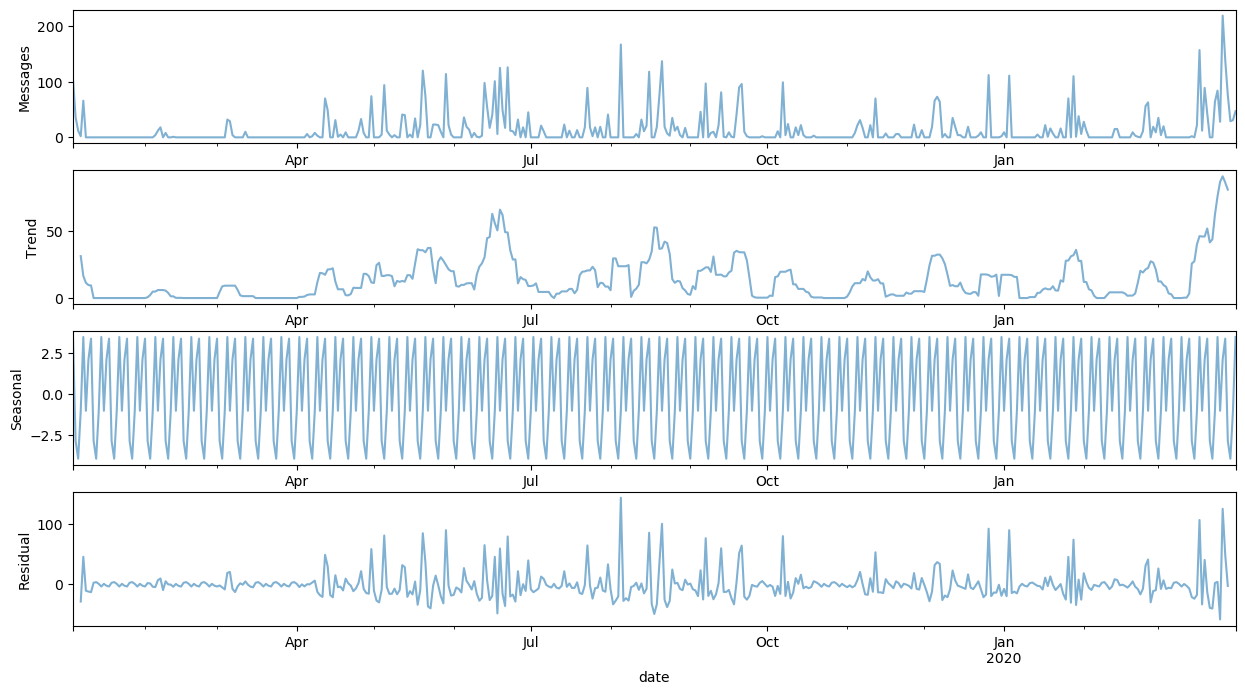

In [40]:
##
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(ts, model='additive')

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(15,8))
ts.plot(ax = ax1, color = '#80b1d3')
res.trend.plot(ax=ax2, color = '#80b1d3')
res.seasonal.plot(ax=ax3, color = '#80b1d3')
res.resid.plot(ax=ax4, color = '#80b1d3')
ax1.set_ylabel('Messages')
ax2.set_ylabel('Trend')
ax3.set_ylabel('Seasonal')
ax4.set_ylabel('Residual')
plt.show()

### Testing for a Stationary Time Series
In forecasting and time series analysis stationarity is an important concept. This is because stationary processes are easier to analyze. In the most intuitive sense, __stationarity means that the statistical properties of a process generating a time series do not change over time__. It does not mean that the series does not change over time, just that the way it changes does not itself change over time. This is an extremely important distinction. 

As such, the ability to determine if a time series is stationary is important. Rather than deciding between two strict options, this usually means being able to ascertain, with high probability, that a series is generated by a stationary process. This tends to be done statistically and through the use of visualizations. This section explores two key tests involved in determining if a time series is stationary or not.

Test such as the ADF, augmented Dickey–Fuller, test tests the null hypothesis that a unit root is present in a time series sample. The KPSS, or Kwiatkowski–Phillips–Schmidt–Shin, tests are used for testing a null hypothesis that an observable time series is stationary around a deterministic trend against the alternative of a unit root. A unit root is a stochastic trend in a time series, sometimes called a “random walk with drift”; If a time series has a unit root, it shows a systematic pattern that is unpredictable. The tests listed above help determine if the unit root is present.

In [105]:
## ADF - KPSS
from statsmodels.tsa.stattools import adfuller, kpss
# ADF Test
result = adfuller(ts.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(ts.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -3.916109880218085
p-value: 0.0019194347229752155
Critial Values:
   1%, -3.4451978474132234
Critial Values:
   5%, -2.8680864144212057
Critial Values:
   10%, -2.5702569996789792

KPSS Statistic: 0.275360
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


The ADF tests that the null hypothesis that the time series possesses a unit root and is non-stationary. The p-value for the ADF test is 0.0019. p-value < Critical Value (0.1, 0.05, 0.01) and therefore the null-value that the time-series is non-stationary is rejected.

The KPSS tests figures out if a time series is stationary around a mean or linear trend, or is non-stationary due to a unit root. The null hypothesis for the test is that the data is stationary. The null hypothesis and the p-value interpretation is just the opposite of ADH test. Here the p-value for the KPS test is 0.1. p-value >= Critical Value (0.1, 0.05, 0.01) and therefore the null-value that the time-series is non-stationary is rejected.

### The ARIMA Time Series Model
One of the most common methods used in time series forecasting is known as the ARIMA model, which stands for Autoregressive Integrated Moving Average. ARIMA is a model that can be fitted to time series data in order to better understand or predict future points in the series.

There are three distinct integers (p, d, q) that are used to parametrize ARIMA models. Because of that, ARIMA models are denoted with the notation ARIMA(p, d, q). Together these three parameters account for seasonality, trend, and noise in datasets:

    p is the auto-regressive part of the model. It allows us to incorporate the effect of past values into our model. Intuitively, this would be similar to stating that it is likely to be warm tomorrow if it has been warm the past 3 days. 
    
    d is the integrated part of the model. This includes terms in the model that incorporate the amount of differencing (i.e. the number of past time points to subtract from the current value) to apply to the time series. Intuitively, this would be similar to stating that it is likely to be same temperature tomorrow if the difference in temperature in the last three days has been very small.  
    
    q is the moving average part of the model. This allows us to set the error of our model as a linear combination of the error values observed at previous time points in the past. 
    
When dealing with seasonal effects, we make use of the seasonal ARIMA, which is denoted as ARIMA(p,d,q)(P,D,Q)s. Here, (p, d, q) are the non-seasonal parameters described above, while (P, D, Q) follow the same definition but are applied to the seasonal component of the time series. The term s is the periodicity of the time series (4 for quarterly periods, 12 for yearly periods, etc.).

In [111]:
## Creating ARIMA parameters
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


When evaluating and comparing statistical models fitted with different parameters, each can be ranked against one another based on how well it fits the data or its ability to accurately predict future data points. We will use the AIC (Akaike Information Criterion) value, which is conveniently returned with ARIMA models fitted using statsmodels. The AIC measures how well a model fits the data while taking into account the overall complexity of the model. A model that fits the data very well while using lots of features will be assigned a larger AIC score than a model that uses fewer features to achieve the same goodness-of-fit. Therefore, we are interested in finding the model that yields the lowest AIC value.

In [106]:
## Grid search across ARIMA parameters while optimising for lowest AIC
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts, order=param, seasonal_order=param_seasonal, enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            # print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:4427.902221278127
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4314.15517140216
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:4518.895968625939
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4152.760176084306
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4320.312210557298
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:4269.3235359232785
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4241.705626111925
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:4153.936928520525
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:4373.743787051715
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:4265.036013186671
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:4497.644836886427
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:4125.312361264747
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:4281.895526841223
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:4241.055744554326
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:4233.023507271459
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:4125.620253905058
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:4518.916602580989
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:4403.83407677593
ARIMA(0, 1,

The output of our code suggests that SARIMAX(1, 1, 1)x(1, 1, 1, 12) yields the lowest AIC value of 4098.121. We should therefore consider this to be optimal option out of all the models we have considered.

### Fitting the ARIMA Time Series Model
The summary attribute that results from the output of SARIMAX returns a significant amount of information, but we’ll focus our attention on the table of coefficients. The coef column shows the weight (i.e. importance) of each feature and how each one impacts the time series. The P>|z| column informs us of the significance of each feature weight. Here, each weight has a p-value lower or close to 0.05, so it is reasonable to retain all of them in our model.

In [107]:
mod = sm.tsa.statespace.SARIMAX(ts,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1098      0.046      2.390      0.017       0.020       0.200
ma.L1         -0.9126      0.023    -39.638      0.000      -0.958      -0.867
ar.S.L12      -0.1731      0.068     -2.554      0.011      -0.306      -0.040
ma.S.L12      -0.9515      0.042    -22.645      0.000      -1.034      -0.869
sigma2       808.4435     26.790     30.177      0.000     755.936     860.951


Although we have a satisfactory fit, some parameters of our seasonal ARIMA model could be changed to improve our model fit. For example, our grid search only considered a restricted set of parameter combinations, so we may find better models if we widened the grid search.

### Validating Forecasts
In order to validate the ARIMA model, the forecasts must be plotted. The dynamic=False argument (in the get_predition function) ensures that we produce one-step ahead forecasts, meaning that forecasts at each point are generated using the full history up to that point.

It is also useful to quantify the accuracy of our forecasts. We will use the MSE (Mean Squared Error), which summarizes the average error of our forecasts. For each predicted value, we compute its distance to the true value and square the result. The results need to be squared so that positive/negative differences do not cancel each other out when we compute the overall mean.

The MSE and RMSE are high indicating a model that does not fit the data extremely well. This is in part due to the nature of the text dataset and also due to an sub-optimised model. A more extensive grid-search might have been needed when attempting to minimize the AIC.

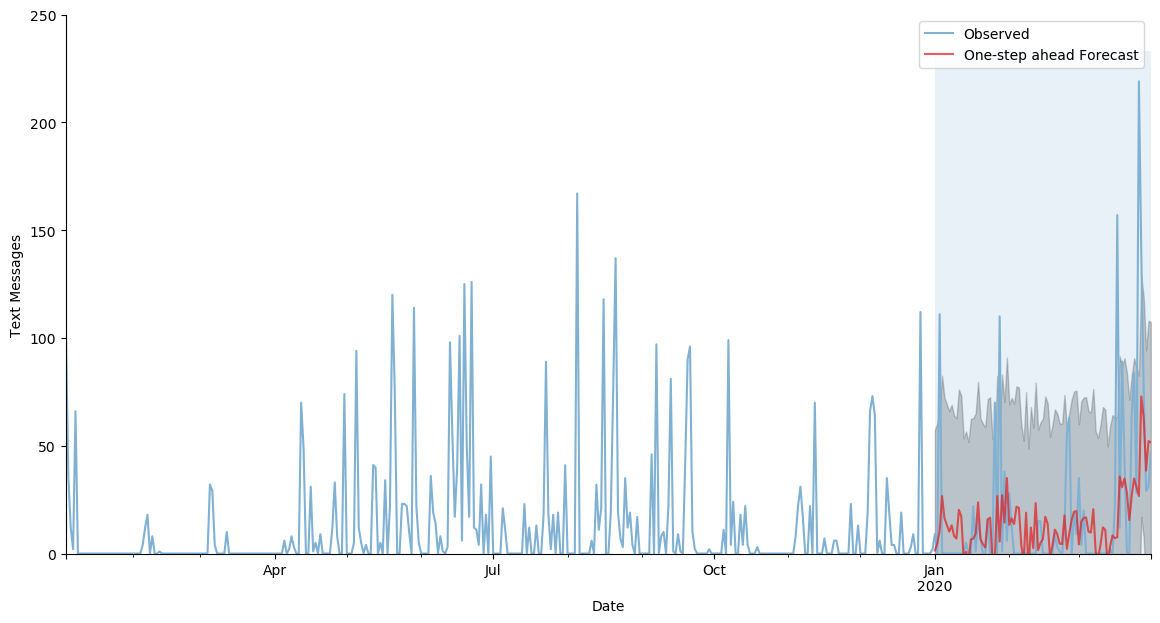

In [45]:
pred = results.get_prediction(start=pd.to_datetime('2020-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = ts['2019':].plot(label='Observed', color = '#80b1d3')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7), color = '#e31a1c')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)


ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2020-01-01'), pd.to_datetime('2020-04-01'),
                 alpha=.1, zorder=1)

ax.set_ylim(0,250)
ax.set_xlabel('Date')
ax.set_ylabel('Text Messages')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
ax.legend(facecolor = 'white', loc='upper left')
plt.legend()
plt.show()

In [46]:
ts_forecasted = pred.predicted_mean
ts_truth = ts['2020-01-01':]
mse = ((ts_forecasted - ts_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1290.63


In [47]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 35.93


### Producing and Visualizing Forecasts
In this final stage the ARIMA model will be leveraged to forecast future text messages. The confidence interval (95%) is plotted in grey along the red forecasted daily mean. This interval bounds the mean to a sensible and widely used prediction interval. An alpha of 0.05 means that the ARIMA model will estimate the upper and lower values around the forecast where there is a only a 5% chance that the real value will not be in that range. Put another way, the 95% prediction interval suggests that there is a high likelihood that the real observation will be within the range.

The forecast shows that the daily messages should trend upward. This might relate to the recent uptick in daily conversation along with the spring/summer seasonality experienced last year.

It is extremely difficult to forecast, and even harder to get it right. This dataset lacks the thousands of data points and multiple years of time series data that can help pick up a trend, seasonality and cyclicity. As we forecast further out into the future, it is natural for us to become less confident in our values. This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.

In order to improve this forecast the further ARIMA model parameters need to be tested and fitted. Various performance metrics need to be investigated. AIC was used for this process and the optimization of out-of-sample mean square error might be better instead.

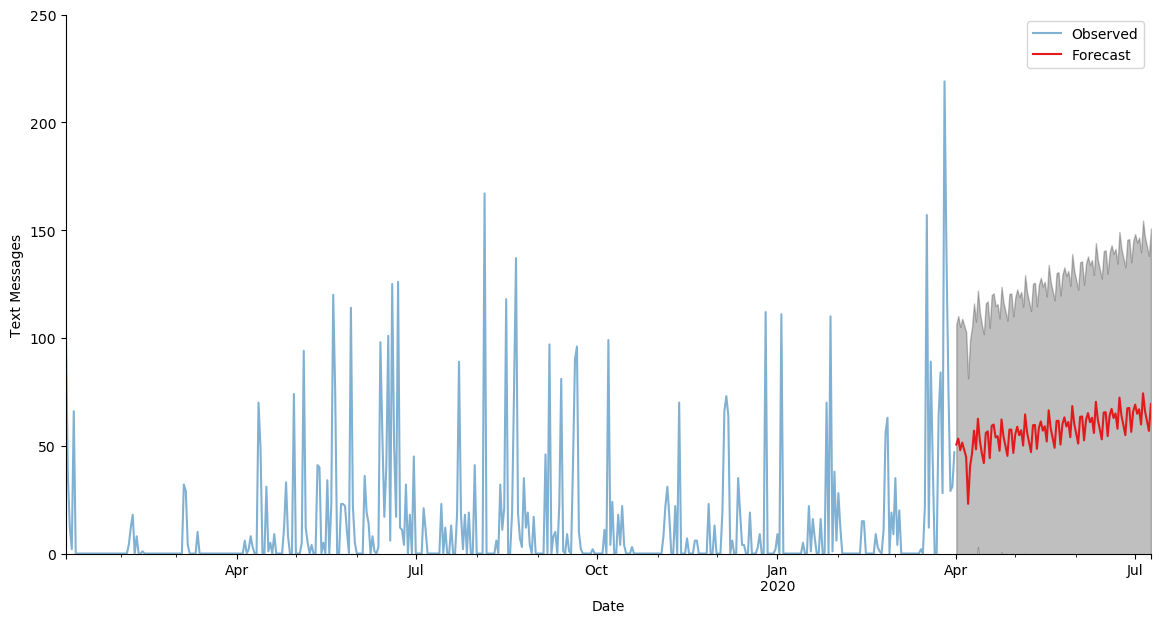

In [48]:
## Forecasting
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = ts.plot(label='Observed', figsize=(14, 7), color = '#80b1d3')
pred_uc.predicted_mean.plot(ax=ax, label='Forecast', color = '#e31a1c')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_ylim(0,250)
ax.set_xlabel('Date')
ax.set_ylabel('Text Messages')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
ax.legend(facecolor = 'white', loc='upper left')
plt.legend()
plt.show()

## Natural Language Processing
This section will utilize the Natural Language Toolkit (NLTK) module to extract information from each word and from each message group members have sent.  

The messages in the group tend to be written in a mixture of Spanish and English. Catalan is sometimes thrown in the mix as well, meaning a total of three languages might make up a single message. In order to have consistent read of each message using NLTK, a function will be created that checks if a message is completely English. This will limit the amounts of messages studied with NLTK and it should increase the accuracy of the messages polarity.

### Chat Language
This subsection will dive into the languages the group tends to use. Messages will be seperated by language and visulised to see what languages, or mix of, are used the most.

In [49]:
## Sentence checker function that checks if every word in the message is in english. If all words in the message are in enlgish it returns True
import enchant
from enchant.checker import SpellChecker

def is_in_english(sentence):
    d = enchant.Dict('en_US')
    d.set_text(sentence)
    errors = [err.word for err in d]
    return False if len(errors > 0) else True

In [50]:
## Sentence spell check function
from enchant import DictWithPWL
from enchant.checker import SpellChecker

def sentence_check(sentences, language_dict):
    my_dict = DictWithPWL(language_dict)
    my_checker = SpellChecker(my_dict)

    err_words = []
    messages = []

    for message in sentences:
        my_checker.set_text(message)
        for error in my_checker:
            err_words.append(error.word)
        len_e = len(err_words)
        if len_e == 0:
            messages.append(message)
        err_words = []
    return messages

In [51]:
## Text messages are in english are added to an "English Messages" list
english_messages = sentence_check(list(df['Content']), "en_US")
print(f'The list of English messages includes: {english_messages[16:21]}')

The list of English messages includes: [' No?', ' Na ', ' Good one', " The quality of the hoops were trash last time though. I'll check out on Friday first thing if they have been fished", ' Yeah unfortunately they were trash']


The english_messages list now contains all messages in the group chat that are entirely made up of English words.

In [52]:
## Find index of messages in original dataframe that are english sentences 
df_idx = []
for message in english_messages:
    if message in list(df['Content']):
        df_idx.append(df.index[df['Content'] == message].tolist())

In [53]:
## Flatten and remove duplicates
flat_list = []
for sublist in df_idx:
    for item in sublist:
        flat_list.append(item)

final = list(set(flat_list))

In [54]:
## Add English content
english_content = []

for index in final:
    english_content.append(content[index])

len(english_content)

1827

In [55]:
## A final transformation is made to each message in the dataset in order to facilitate the sentiment anlysis
english_content_f = []

for message in range(len(english_content)):
    a = english_content[message]
    b = '[' + a
    c = b[:18] + ']' + b[18:]
    d = c[:19] + c[21:]
    english_content_f.append(d)
    
print(f'There are a total of {len(english_content_f)} messages in english in the dataset') 

There are a total of 1827 messages in english in the dataset


In the entire dataset there are 1827 messages written in complete English. The other +4500 messages are either Spanish, Catalan or a mixture of the languages. The message count for the remaining two languages will be found in a similar manner.

In [56]:
## Find Spanish and Catalan texts
spanish_messages = sentence_check(list(df_lang['Content']), "es_SP")
catalan_messages = sentence_check(list(df_lang['Content']), "ca_CA")

print(f'There are a total of {len(spanish_messages)} messages in spanish in the dataset' '\n')
print(f'The list of Spanish messages includes: {spanish_messages[:5]}' '\n')
print(f'There are a total of {len(catalan_messages)} messages in catalan in the dataset' '\n') 
print(f'The list of Catalan messages includes: {catalan_messages[29:34]}')

There are a total of 1547 messages in spanish in the dataset

The list of Spanish messages includes: [' Que os va mejor a todos', ' Yo sumo ambos', ' Salva ha ganado dos veces', ' Marcos 2', ' Yo una']

There are a total of 576 messages in catalan in the dataset

The list of Catalan messages includes: [' Es veritat', ' Jo no puc', ' Curro', ' Al mati o tarde venga', ' Dees?']


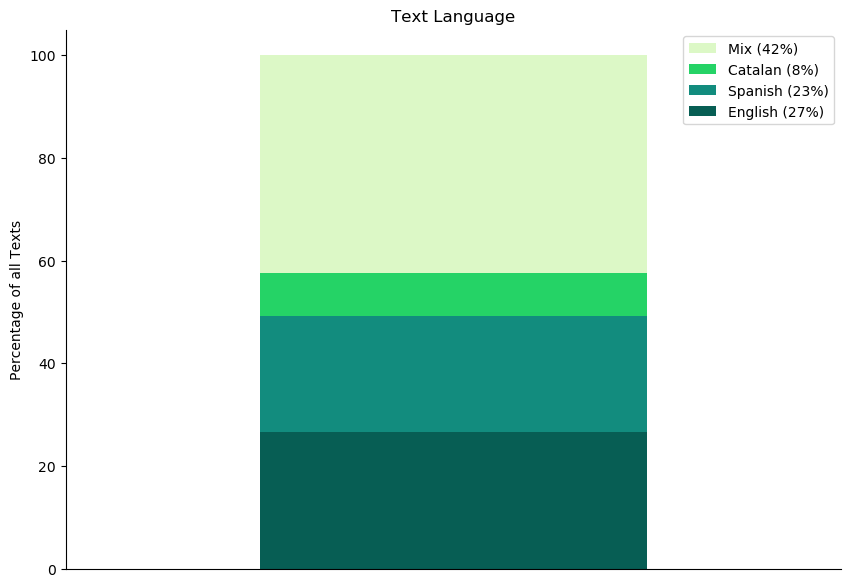

In [57]:
## Plotting % stacked chart
raw_data = {'English (27%)': [1827/6865*100], 'Spanish (23%)': [1547/6865*100],
            'Catalan (8%)': [576/6865*100], 'Mix (42%)' : [2915/6865*100]}
df_bl = pd.DataFrame(raw_data)


colors = ['#075E54', '#128C7E', '#25D366', '#DCF8C6']

ax = df_bl.loc[:,['English (27%)','Spanish (23%)', 'Catalan (8%)', 'Mix (42%)']].plot.bar(stacked=True, figsize=(10,7), color=colors)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.legend(facecolor = 'white')
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='upper right', facecolor = 'white') 
plt.xticks([])
plt.ylabel('Percentage of all Texts')
plt.title('Text Language')
handles, labels = ax.get_legend_handles_labels()
plt.show()

### Sentiment Analysis and Polarity
Natural language processing (NLP) is a subfield of linguistics, computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human languages, in particular how to program computers to process and analyze large amounts of natural language data. Natural language processing can be leveraged by users to improve the efficiency of classification processes, improve the accuracy of documentation, and identify the most pertinent information from large databases. 

Sentiment Analysis (also known as opinion mining or emotion AI) is a sub-field of NLP that is ivolved in the interpretation and classification of emotions (positive, negative and neutral) within text data using text analysis techniques. Emotion detection aims at detecting emotions, like happiness, frustration, anger, sadness, and so on. Many emotion detection systems use lexicons (i.e. lists of words and the emotions they convey) and complex machine learning algorithms.

One of the downsides of using lexicons is that people express emotions in different ways. Some words that typically express anger or disgust like "sick" or "ill" (e.g. This makes me feel sick) might also express happiness (e.g. This post is sick!).

In [58]:
## Import natural language tool kit
import nltk
from nltk.corpus import stopwords   
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

In [59]:
## Instantiate sentiment analyser
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
sid = SentimentIntensityAnalyzer()

In [60]:
## Function to return the polarity, date, and message of each text in the english_content dataset
pol_lst = []
date_lst = []
msg_lst = []
i = 0

for line in english_content_f:
    
    try:
    
        text = nltk.sent_tokenize(line.split(':')[2].replace('\n',' '))
        date = line.split('[')[1].split(',')[0]
        
        for token in text:
            
            ss = sid.polarity_scores(token)  
            pol_lst.append(ss['compound'])
            date_lst.append(date)
            msg_lst.append(text)
            
    except:
        
        # print(i, line) # uncomment this to print the message that couldn't be read
        
        pass
    #i+=1   # uncomment this to see the line number that the message fails to be read

In [61]:
## Dataframe containing all the messages in engish and their polarity score
pol_df = pd.DataFrame({'date' : date_lst, 'pol' : pol_lst, 'msg' : msg_lst})
pol_df.sort_values('pol')
negative = pol_df.sort_values('pol').iloc[0, 2]
neg_score = pol_df.sort_values('pol').iloc[0, 1]
positive = pol_df.sort_values('pol').iloc[-1, 2]
pos_score = pol_df.sort_values('pol').iloc[-1, 1]

print(f'The text with the lowest polarity (negative) score is {negative} with a'
      f'\n polarity score of {neg_score}' '\n')
print(f'The text with the highest polarity (positive) score is {positive} with a'
      f'\n polarity score of {pos_score}')

The text with the lowest polarity (negative) score is [' Hahahaahaha pues instead of bomb threat, un corona threat'] with a
 polarity score of -0.875

The text with the highest polarity (positive) score is [' Thankful to have been blessed to watch this man'] with a
 polarity score of 0.8225


In [62]:
## Calculate mean polarity by day
daily_pol_df = pol_df.groupby('date').mean()
daily_pol_df.index = pd.to_datetime(daily_pol_df.index)
daily_pol_df.sort_index()
daily_pol_df['dates'] = daily_pol_df.index
daily_pol_df.sort_values('dates')
daily_pol_df = daily_pol_df[daily_pol_df['dates'] < '2020-04-01'] 
daily_pol_df['positive'] = daily_pol_df['pol'] > 0
daily_pol_df.sort_values('dates')

,pol,dates,positive
date,,,
2019-01-04,-0.015913,2019-01-04,False
2019-01-05,0.007829,2019-01-05,True
2019-01-06,-0.059200,2019-01-06,False
2019-01-08,0.109240,2019-01-08,True
2019-02-05,0.000000,2019-02-05,False
...,...,...,...
2020-03-25,-0.009336,2020-03-25,False
2020-03-26,-0.036036,2020-03-26,False
2020-03-27,0.026226,2020-03-27,True


The groups polarity can now be plotted against time. Each days polarity has been calculated by averaging out the days individual texts polarity scores. Days which have no conversation have a polarity score of 0.

It is interesting to note that days of positive polarity tend to be followed by a day of negative polarity. Other than the positive stretch of the group during the summer month of June, the scores invert quite frequently. The last couple months from mid-February onward seem to have been primarily negative (Covid-19?).

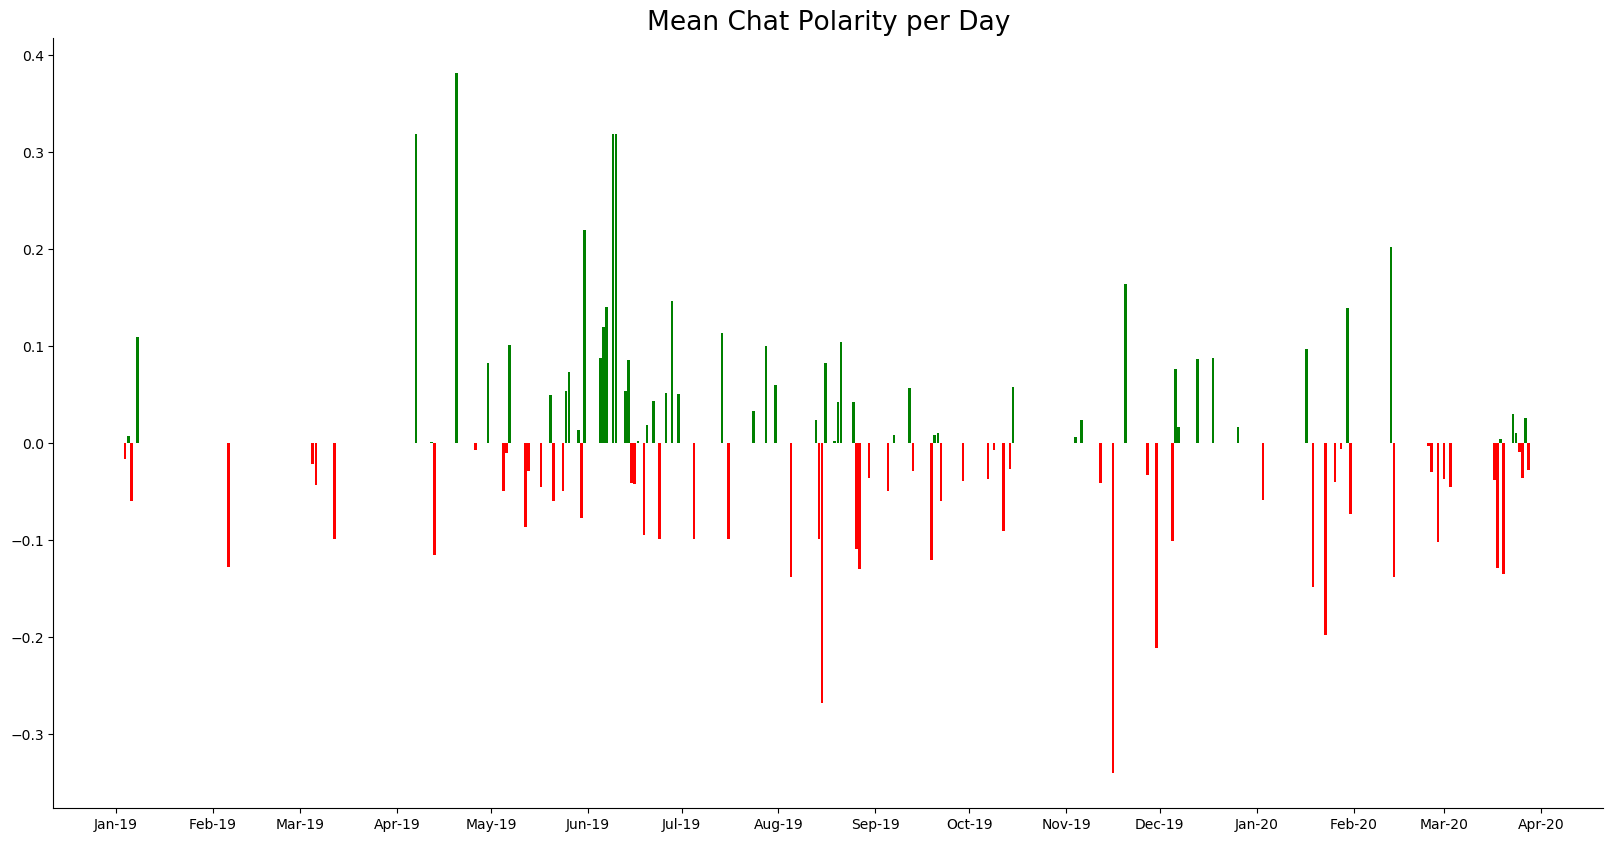

In [63]:
import matplotlib.dates as mdates
## Visualise Polarity per day
locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b-%y')

plt.figure(figsize = (20,10))
plt.bar(daily_pol_df['dates'], daily_pol_df['pol'], color=daily_pol_df['positive'].map({True: 'g', False: 'r'}))
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.title('Mean Chat Polarity per Day', size = 19)
plt.show()

### Sentiment Improvements
The chart above displays the groups mean polarity per day. The chart lacks the ability to tell who is contributing positively towards the mean and who is lowering it. Similarly, the code utilized above ignored emojis utilized through the text. Emojis can be quite reflective about how someone feels and what emotion they are showing. 

This next section takes a more detailed approach into the groups sentiment. It segments the messages and the polarity of each message per day and also by sender. It includes emojis in its polarity and visualizes all these changes.

In [64]:
## Including Emojis and persons name
from collections import defaultdict
from collections import Counter

final = defaultdict(list)
i = 1 # used as final dictioanry key

for line in english_content_f[1:]:
        
        try:
            date = line.split('[')[1].split(',')[0] # strip just the date
            person = line.split(':')[1][4:]  # strip the persons name
            text = ':'.join(line.split(':')[2:])  # strip just the text
            # joins back on the ':' -> useful for smiley face ':)'
            # which has sentiment associated
         
            # convert emojis to their Unicode description ...works well with sentiment
            # loop through each character to check if it's an emoji, then convert
            for c in text:
                if c in emoji.UNICODE_EMOJI:
                    text = text.replace(c, emoji.demojize(c).replace('_',' ').replace(':','.'))
            
            # tokenize the sentence, i.e. split up into chunks based on punctuation.   
            sentence = nltk.sent_tokenize(text)
            num = np.array([])
            
            for token in sentence:
                # calculate sentiment of token and add to the final dictionary 
                # along with person and date metrics
                ss = sid.polarity_scores(token)
                
                final[i] = [ss['compound'], person, date, token]
                i+=1
                
        except:
            pass

In [65]:
## Creating message sentiment DF
sent_df = pd.DataFrame(final).T
sent_df.columns = ['pol', 'name', 'date', 'message']
sent_df['pol'] = sent_df['pol'].apply(lambda x: float(x))
sent_df

,pol,name,date,message
1,0.0,Alex Bernaus,01/04/2019,Yo sumo ambos
2,0.0,Marc Pamias,01/04/2019,Marcos 2
3,0.0,Marc Pamias,01/04/2019,<Media omitted>
4,0.0,Marc Pamias,01/04/2019,1 v 1
5,0.0,Jaume Clave,01/04/2019,.skull..skull..skull.
...,...,...,...,...
1835,0.0,Alvaro Iranzo,28/03/2020,<Media omitted>
1836,0.0,Alvaro Iranzo,28/03/2020,Este lo habiais visto?
1837,0.0,Alvaro Iranzo,29/03/2020,Boys send those bets!
1838,0.0,Alex Bernaus,29/03/2020,Boobies!!


In [66]:
## Grouping DF (daily) by person
daily_sent_df = sent_df.groupby(['date', 'name'], as_index = False).agg('mean')

## Combined daily polarity
daily_combined_sent_df = sent_df.groupby(['date'], as_index = False).agg('mean')
daily_combined_sent_df['name'] = 'Combined'

final_sent_df = pd.concat([daily_sent_df, daily_combined_sent_df])
final_sent_df['date'] = pd.to_datetime(final_sent_df.date)
final_sent_df = final_sent_df[final_sent_df['date'] <= '2020-03-31']
final_sent_df = final_sent_df[final_sent_df['date'] > '2019-01-03']
final_sent_df.sort_values('date')

,date,name,pol
2,2019-01-04,Combined,-0.068739
8,2019-01-04,Alex Bernaus,-0.167286
9,2019-01-04,Jaume Clave,0.000000
10,2019-01-04,Marc Pamias,-0.034167
11,2019-01-04,Marcos T,0.000000
...,...,...,...
566,2020-03-28,Marc Pamias,0.000000
567,2020-03-28,Marcos T,0.220200
576,2020-03-29,Alex Bernaus,0.000000
577,2020-03-29,Alvaro Iranzo,0.000000


In [67]:
## Because some graphs (and for general ease) don't like having a datetime axis... we create a numerical 
## column that maps to the day with 'dense rank'
final_sent_df['x'] = final_sent_df['date'].rank(method = 'dense', ascending = True).astype(int)
print('This dataframe includes the polarity score for each memeber, and a combined total score,' 
      '\n' 'on each day the user was active:')
final_sent_df.sort_values('date').head(10)

This dataframe includes the polarity score for each memeber, and a combined total score,
on each day the user was active:


,date,name,pol,x
2,2019-01-04,Combined,-0.068739,1
8,2019-01-04,Alex Bernaus,-0.167286,1
9,2019-01-04,Jaume Clave,0.000000,1
10,2019-01-04,Marc Pamias,-0.034167,1
11,2019-01-04,Marcos T,0.000000,1
14,2019-01-05,Marc Pamias,-0.170200,2
3,2019-01-05,Combined,0.007829,2
12,2019-01-05,Gerard Pino,0.000000,2
13,2019-01-05,Jaume Clave,0.088600,2
15,2019-01-05,Marcos T,0.000000,2


In [68]:
## Mean polarity score per person into DF
names = ['Combined', 'Alex Bernaus', 'Alex Pascual', 'Alvaro Iranzo', 'Gerard Pino', 'Jaume Clave', 'Marc Pamias', 'Marcos T']
mean_pols = {} 

for name in names:
    name_df = final_sent_df[final_sent_df['name'] == name]
    mean_pol = name_df['pol'].mean()
    mean_pols.update({name:mean_pol})

mean_pol_df = pd.DataFrame(mean_pols.items(), columns = ['name', 'pol_score'])

print('This dataframe shows the members means polarity scores for the entire history of the chat')
mean_pol_df.sort_values('pol_score')

This dataframe shows the members means polarity scores for the entire history of the chat


,name,pol_score
1,Alex Bernaus,-0.044550
4,Gerard Pino,-0.033004
3,Alvaro Iranzo,-0.017285
2,Alex Pascual,-0.006779
0,Combined,0.001340
7,Marcos T,0.003153
5,Jaume Clave,0.019999
6,Marc Pamias,0.023761


The daily mean per user polarity dataframe can now be visualised. Each members daily score is plotted as a scatter point on the graph.

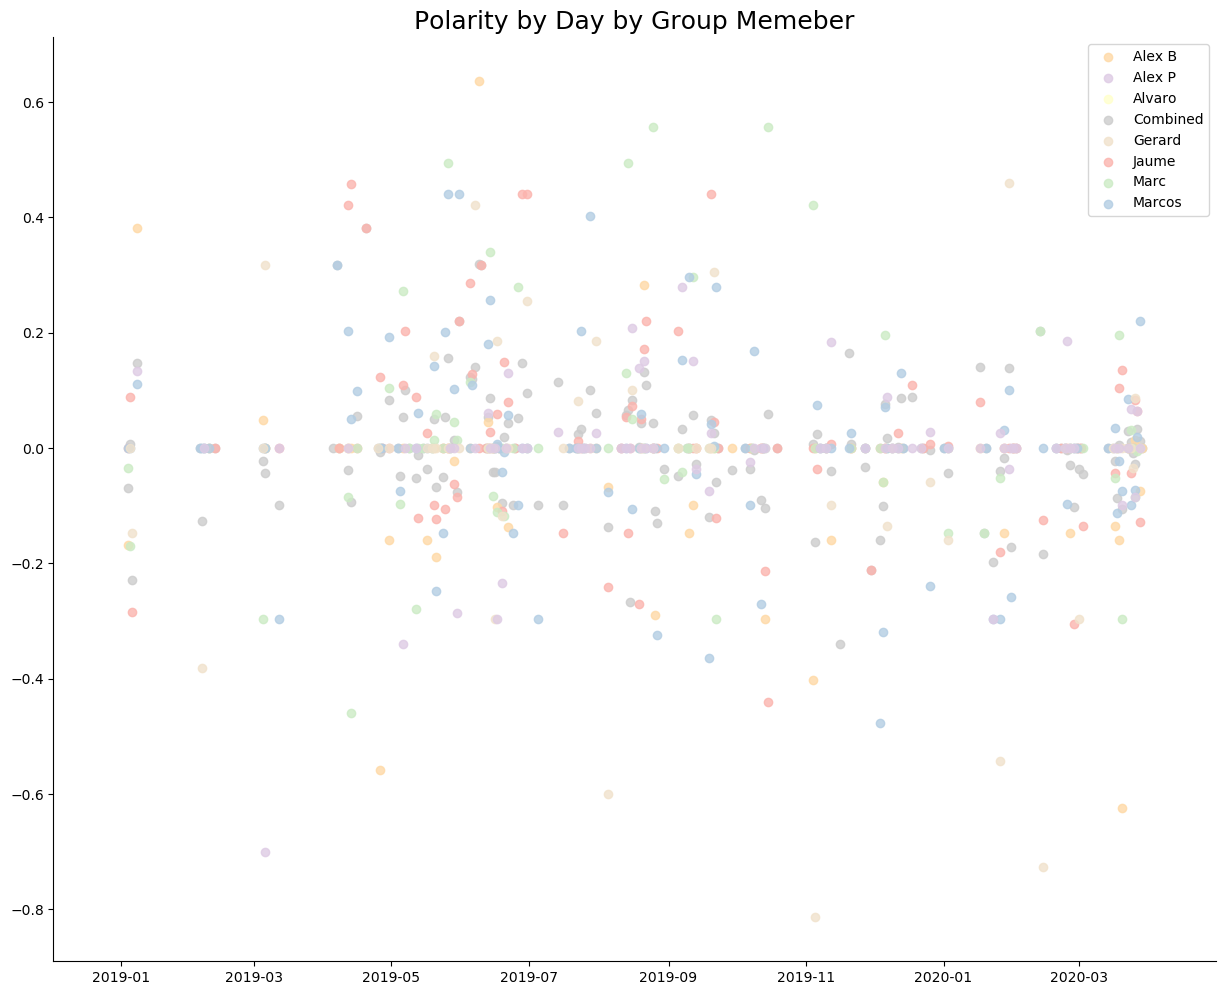

In [69]:
## Polarity per person per day
plt.figure(figsize = (15, 12))

combined = final_sent_df[final_sent_df['name'] == 'Combined']
alex_bernaus = final_sent_df[final_sent_df['name'] == 'Alex Bernaus']
jaume_clave = final_sent_df[final_sent_df['name'] == 'Jaume Clave']
marc_pamias = final_sent_df[final_sent_df['name'] == 'Marc Pamias']
marcos_tapia = final_sent_df[final_sent_df['name'] == 'Marcos T']
gerard_pino = final_sent_df[final_sent_df['name'] == 'Gerard Pino']
alex_pascual = final_sent_df[final_sent_df['name'] == 'Alex Pascual']
alvaro_iranzo = final_sent_df[final_sent_df['name'] == 'Alvaro Iranzon']

pla = plt.scatter(combined['date'], combined['pol'], color  = '#cccccc', alpha = 0.8)
plb = plt.scatter(alex_bernaus['date'], alex_bernaus['pol'], color = '#fed9a6', alpha = 0.8)
plc = plt.scatter(jaume_clave['date'], jaume_clave['pol'], color = '#fbb4ae', alpha = 0.8)
pld = plt.scatter(marc_pamias['date'], marc_pamias['pol'], color = '#ccebc5', alpha = 0.8)
ple = plt.scatter(marcos_tapia['date'], marcos_tapia['pol'], color = '#b3cde3', alpha = 0.8)
plf = plt.scatter(gerard_pino['date'], gerard_pino['pol'], color = '#f1e2cc', alpha = 0.8)
plg = plt.scatter(alex_pascual['date'], alex_pascual['pol'], color = '#decbe4', alpha = 0.8)
plh = plt.scatter(alvaro_iranzo['date'], alvaro_iranzo['pol'], color = '#ffffcc', alpha = 0.8)
plt.legend([plb, plg, plh, pla, plf, plc, pld, ple], 
           ["Alex B", "Alex P", "Alvaro", "Combined", "Gerard", "Jaume", "Marc", "Marcos"], facecolor = 'white')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.title('Polarity by Day by Group Memeber', fontsize=18)
plt.show()

### Sentiment: Rolling Mean
A moving average (rolling mean or running average) is a calculation to analyze data points by creating a series of averages of different subsets of the full data set. A moving average can be used with time series data to smooth out short-term fluctuations and highlight longer-term trends or cycles in the users sentiment. 

A 10 day rolling mean will be used here. The simple equally weighted running mean for a n-day sample of closing polarity scores is the mean of the previous n days' closing polarity scores. If those polarity scores are: 

<img src = "https://wikimedia.org/api/rest_v1/media/math/render/svg/a893fea56c8ece5bbdef8bd2c31e456556ef29fb"/>

then the formula is:

<img src = "https://wikimedia.org/api/rest_v1/media/math/render/svg/61f0e3ed443130803f5e4f57924fed0f8d6a8f37" style = "width:260px; height:90px"/>

A major drawback of the SMA is that it lets through a significant amount of the signal shorter than the window length. Worse, it actually inverts it. This can lead to unexpected artifacts, such as peaks in the smoothed result appearing where there were troughs in the data. It also leads to the result being less smooth than expected, since some of the higher frequencies are not properly removed.

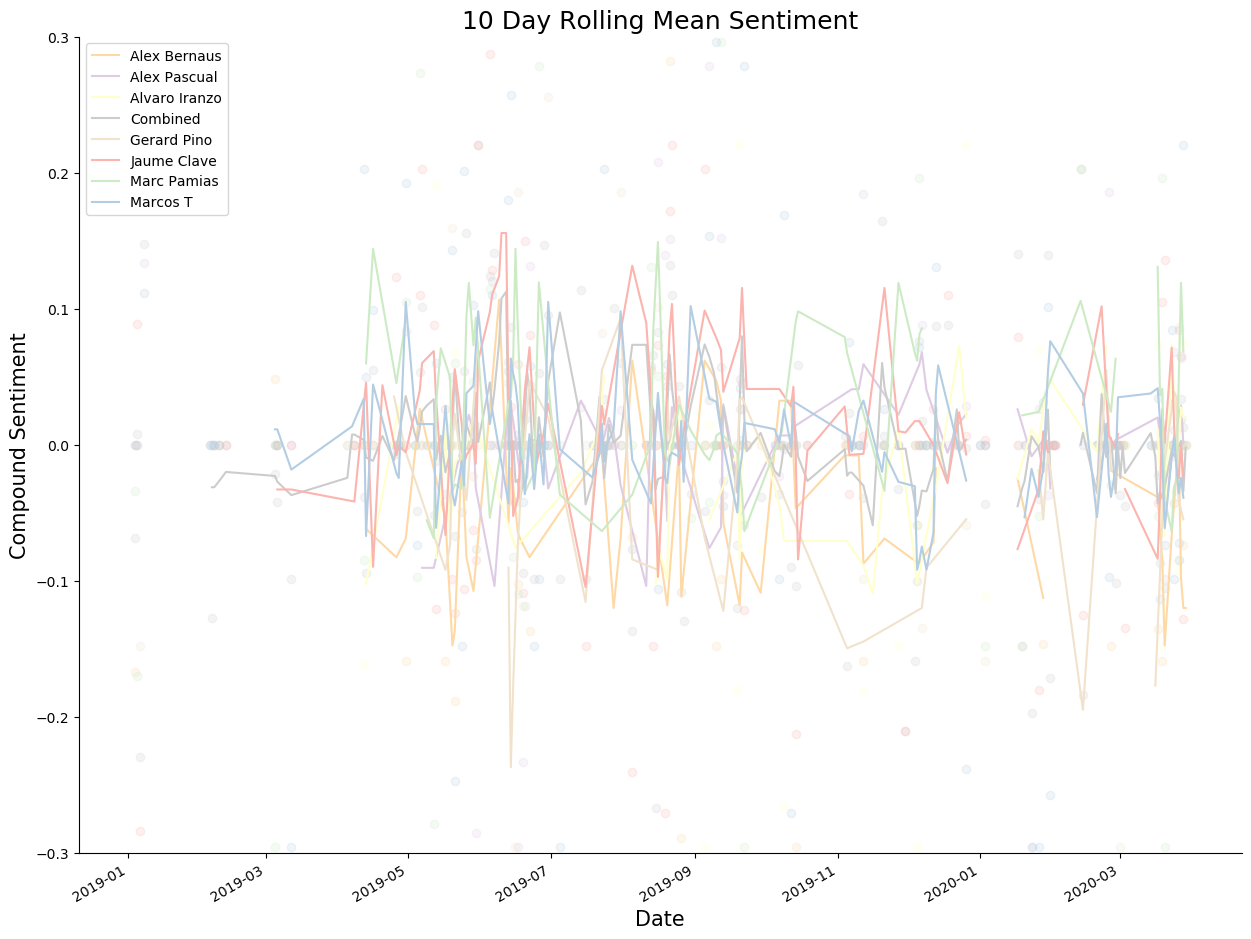

In [70]:
fig, ax = plt.subplots(figsize=(15, 12))
colours=['#fed9a6','#decbe4','#ffffcc','#cccccc','#f1e2cc', '#fbb4ae', '#ccebc5','#b3cde3']
i=0

for label, df in final_sent_df.groupby('name'):
    
    new=df.reset_index()
    new['rol'] = new['pol'].rolling(10).mean() # rolling mean calculation on a 10 day basis
    
    g = new.plot(x='date', y='rol', ax=ax, label=label, color=colours[i]) # rolling mean plot
    plt.scatter(df['date'].tolist(), df['pol'], color=colours[i], alpha=0.2) # underlying scatter plot
    
    i+=1

ax.set_ybound(lower=-0.3, upper=0.3
)
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Compound Sentiment', fontsize=15)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
g.set_title('10 Day Rolling Mean Sentiment', fontsize=18)
plt.legend(facecolor = 'white')

plt.show()
#plt.savefig('plots/sentiment_time')   # uncomment to save

## Categorizing Text using NLTK
This section contains a more in-depth NLP analysis. A dictionary containing the names and messages of each member in the chat will be created as this is best-practice when working with textual data.

Text may contain stop words like ‘the’, ‘is’, ‘are’. Stop words can be filtered from the text to be processed. There is no universal list of stop words in nlp research, however the nltk module contains a list of stop words that is sufficient for the aim of this task. This list is imported by the stopwords import from the nltk.corpus module.

In [71]:
## Dictionary with only english sentences
ppl = defaultdict(list)

for line in english_content_f:
    
    try:
        # date = line.split('[')[1].split(',')[0]
        person = line.split(':')[1][4:]
        text = nltk.sent_tokenize(':'.join(line.split(':')[2:]))
        
      
        ppl[person].extend(text)   # If key exists: extend (value) list, if not create a new key with text extended to list
                 
    except:
        #print('Error!')
        #print(line)   # uncomment to examine failed line
        
        pass

In [72]:
## Removing wrong keys
#print(ppl.keys(), '\n')      

ppl.pop('Marc Pamias created group "Expansion Crew"')
ppl.pop('Messages to this group are now secured with end-to-end encryption. Tap for more info.')
ppl.pop('Marc Pamias added you')
ppl.pop("Marcos T changed this group's icon")
ppl.pop('en.spot]y.com/track/44ZJ4hLD5onikKsVLQaILr?si=UxibEUFaQmGjdHD-azIrYA')
ppl.pop('t]')
ppl.pop(']')
ppl.pop('')
ppl.pop('cks]')

print(ppl.keys())

dict_keys(['Alex Bernaus', 'Marc Pamias', 'Jaume Clave', 'Marcos T', 'Alvaro Iranzo', 'Gerard Pino', 'Alex Pascual'])


### NPS Chat Corpus
The NPS Chat Corpus is part of the Natural Language Toolkit (NLTK) distribution.  NLTK is a “platform for building Python programs to work with human language data.”  It includes both the whole NPS Chat Corpus, as well as a number of modules for working with the data.

The NPS Chat Corpus, is made up of over 10,567 posts out of approximately 500,000 posts gathered from various online chat services in accordance with their terms of service. The posts have been privacy masked in two ways. Firstly, all usernames have been changed to generic names of the form "UserN", where N is a unique integer consistently used for each respective poster across all files. Secondly, the posts have been read by humans to remove other personally identifiable information.

A Naive Bayes Classifier will be trained on the NPS Chat Corpus dataset and once trained it will be used to classify the texts in the group chat.

In [73]:
## Naive Bayes model for message classification
#nltk.download('nps_chat')
posts = nltk.corpus.nps_chat.xml_posts()

In [74]:
## Function to extract features 
def extract_features(post):
    features = {}
    for word in nltk.word_tokenize(post):
        features['contains({})'.format(word.lower())] = True
    return features

In [75]:
fposts = [(extract_features(p.text), p.get('class')) for p in posts]

### Machine Learning: Train/Test/Application
In order to perform the supervised learning classification technique using a Naive Bayes classifier two datasets are needed:

1. The "gold standard" dataset, which includes input data along with correctly labeled outputs. This data tends to be prepared by human intervention or through semi-automated data collection means. It is imperative that your data is correct and true in this dataset as this is what will be used to train and tweak the machine learning model. Every data point in this set has a labeled output. In this case, the NPS Chat Corpus is the "gold standard" dataset.  
<br>
2. A dataset that will be applied to the model once it has been trained and deployed. This is the data in which we are interested in learning the output of. We are interested in classifying (output) the text messages from the group chat, so this will be the data we apply to the trained model.

This section will preform training, testing and model application.

1. Training: The data from the "gold standard" (NPS Chat Corpus) is shown and trained on the model, by pairing the input with the expected output. The machine learning model learns patterns and classification techniques through this training.  
<br>
2. Validation/Test phase: This phase is important because it is used to estimate how well the model has been trained (dependent upon the size of the data, the value predicted, input, etc) and to estimate model properties (mean error for numeric predictors, classification errors for classifiers, recall and precision for IR-models etc.). If the model does not achieve the desired results, parameters need to be tweaked and new approaches implemented before training it (step 1) and testing it (step 2) again.  
<br>
3. Application phase: The freshly-developed model is applied to new unseen data (real-world data) and get the results. Since there is no reference value in this type of data (otherwise, why would a model be needed?), you can only speculate about the quality of the model output using the results of the validation phase.

In [103]:
## Create train and test
test_size = int(len(fposts) * 0.2)
train_set, test_set = fposts[test_size:], fposts[:test_size]

### Naive Bayes
Naive Bayes is a classification algorithm for binary (two-class) and multi-class classification problems. It is called naive Bayes or idiot Bayes because the calculation of the probabilities for each hypothesis are simplified to make their calculation tractable. Rather than attempting to calculate the values of each attribute value P(d1, d2, d3|h), they are assumed to be conditionally independent given the target value and calculated as P(d1|h) * P(d2|H) and so on.

The Naive Bayes algorithm assumes conditional independence over the training dataset. This drastically reduces the complexity of above mentioned problem to just 2n. The assumption of conditional independence states that, __given random variables X, Y and Z, we say X is conditionally independent of Y given Z, if and only if the probability distribution governing X is independent of the value of Y given Z.__

In other words, X and Y are conditionally independent given Z if and only if, given knowledge that Z occurs, knowledge of whether X occurs provides no information on the likelihood of Y occurring, and knowledge of whether Y occurs provides no information on the likelihood of X occurring.

A classifier model can be created from these assumptions by finding the probability of a given set of inputs for all possible values of the class variable y and pick up the output with maximum probability. This can be expressed mathematically as:

<img src = "https://wikimedia.org/api/rest_v1/media/math/render/svg/1eaed580cf7c29f044a9e517f1cd4a7dd69c4b1f"/>

In [77]:
## Training the dataset 
classifier = nltk.NaiveBayesClassifier.train(train_set)

print(f'The accuracy of the NLTK Naive Bayes classifier is {nltk.classify.accuracy(classifier, test_set)}')

The accuracy of the NLTK Naive Bayes classifier is 0.6601987695220066


In [102]:
## Testing examples
print(classifier.classify(extract_features('I do')))
print(classifier.classify(extract_features('Do you like icecream?')))
print(classifier.classify(extract_features('How do you feel about this?')))

Statement
ynQuestion
whQuestion


In [79]:
## Running the classifier on all whatsapp messages
ppl_chat = {}

for key, val in ppl.items():
    cat = []
    for sent in val:
        cat.append(classifier.classify(extract_features(sent)))
    #print(cat)
        count = Counter(cat)
    ppl_chat[key] = count
    #print('{}: {} \n \n'.format(key, count.most_common()))

In [80]:
## Add message classification type to DF
msg_class = pd.DataFrame.from_dict(ppl_chat, orient = 'index')

## Normalise the data 
msg_class_norm = msg_class.div(msg_class.sum(axis = 1), axis = 0).round(3)
msg_class_norm

,Statement,Clarify,ynQuestion,Other,Emotion,nAnswer,whQuestion,Accept,Greet,System,Emphasis,Reject,yAnswer,Continuer,Bye
Alex Bernaus,0.407,0.170,0.115,0.110,0.027,0.077,0.022,0.005,0.005,0.027,0.016,0.011,0.005,NaN,NaN
Marc Pamias,0.542,0.140,0.064,0.087,0.030,0.070,0.027,NaN,NaN,0.013,0.007,0.010,0.007,0.003,NaN
Jaume Clave,0.489,0.196,0.055,0.122,0.020,0.022,0.045,NaN,NaN,0.020,0.015,0.012,0.002,NaN,0.002
Marcos T,0.528,0.161,0.061,0.071,0.032,0.047,0.042,0.008,0.008,0.016,0.005,0.005,0.011,0.003,0.003
Alvaro Iranzo,0.486,0.158,0.073,0.119,NaN,0.073,0.028,0.017,NaN,0.017,0.011,0.006,0.011,NaN,NaN
Gerard Pino,0.569,0.138,0.057,0.057,0.016,0.073,0.041,0.008,0.008,0.016,NaN,0.008,0.008,NaN,NaN
Alex Pascual,0.541,0.119,0.052,0.070,0.104,0.059,0.019,0.004,0.004,0.011,0.007,0.007,NaN,NaN,0.004


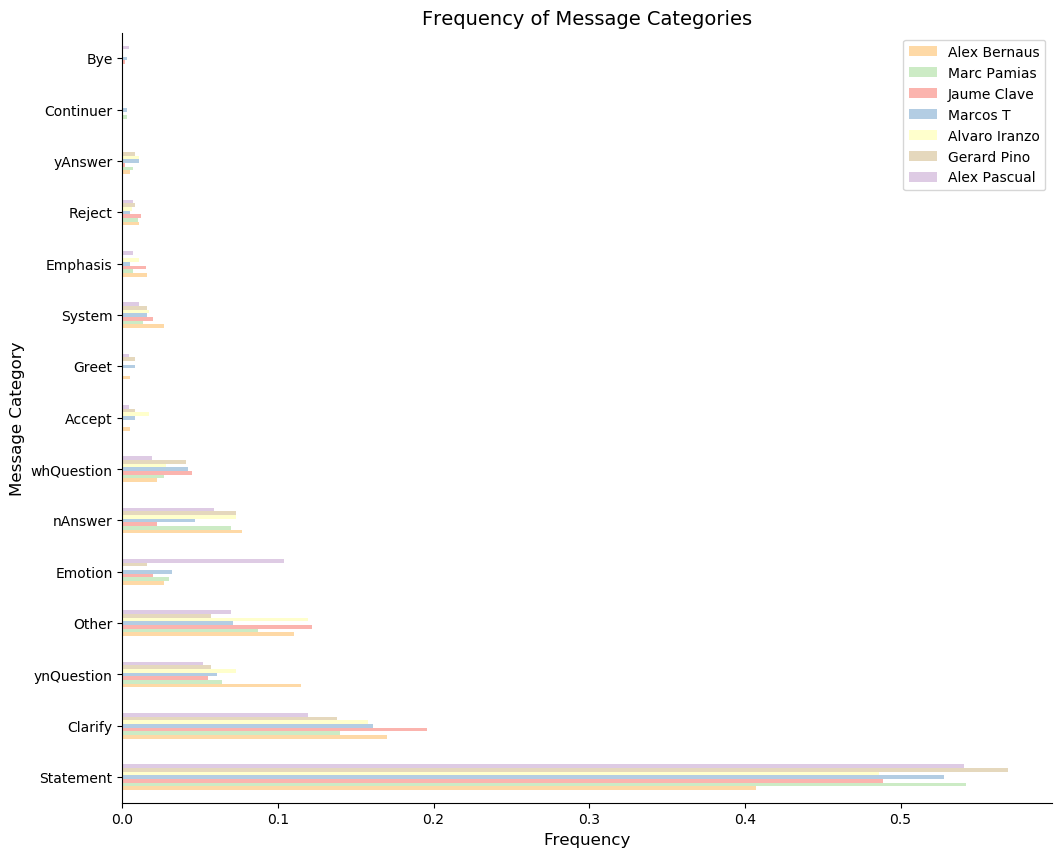

In [81]:
## Plotting 
ax = msg_class_norm.T.plot(kind='barh', figsize=(12, 10), legend=True,
               fontsize=10, color=['#fed9a6', '#ccebc5', '#fbb4ae', '#b3cde3', '#ffffcc', '#e5d8bd', '#decbe4'])
ax.set_title("Frequency of Message Categories", fontsize= 14)
ax.set_xlabel('Frequency', fontsize=12)
ax.set_ylabel("Message Category" , fontsize=12)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.legend(facecolor = 'white')
plt.show()

## Most Frequently Used Words
It is interesting to see what words are most utilized by members of the group. At an individual level and as a whole. To do this, each word from each message will be looped over and counted for other occurrences. Stop words usually refers to the most common words in a language. In English this would be words like "the, who, this, is" and in Spanish these words would be words like "el, a, ellas, que". Stopwords from both languages will be removed before processing the natural language data for word count.

In [82]:
## Dictionary with all sentences used for lexicon 
ppl_all = defaultdict(list)

for line in content_f:
    
    try:
        # date = line.split('[')[1].split(',')[0]
        person = line.split(':')[1][4:]
        text = nltk.sent_tokenize(':'.join(line.split(':')[2:]))
        
      
        ppl_all[person].extend(text)   # If key exists: extend (value) list, if not create a new key with text extended to list
                 
    except:
        #print('Error!')
        #print(line)   # uncomment to examine failed line
        
        pass

In [83]:
## Message list will be converted to string used for analysis
w_ab = ''.join(ppl_all['Alex Bernaus']).split()
w_ap = ''.join(ppl_all['Alex Pascual']).split()
w_ai = ''.join(ppl_all['Alvaro Iranzo']).split()
w_gp = ''.join(ppl_all['Gerard Pino']).split()
w_jc = ''.join(ppl_all['Jaume Clave']).split()
w_mp = ''.join(ppl_all['Marc Pamias']).split()
w_mt = ''.join(ppl_all['Marcos T']).split()
w_all = w_ab + w_ab + w_ai + w_gp + w_jc + w_mp + w_mt 

In [84]:
## English/Spanish stopwords (NLTK)
stopwords_e = nltk.corpus.stopwords.words('english')
stopwords_s = nltk.corpus.stopwords.words('spanish')
stopwords = stopwords_e + stopwords_s
#print(len(stopwords_e))
#print(len(stopwords_s))
#print(len(stopwords))

In [85]:
## Capitlaise stopwords 
for word in stopwords[:492]:
    stopwords.append(word.title())

In [86]:
## Remove stopwords
ab_filtered_words = [word for word in w_ab if word not in stopwords]
ap_filtered_words = [word for word in w_ap if word not in stopwords]
ai_filtered_words = [word for word in w_ai if word not in stopwords]
gp_filtered_words = [word for word in w_gp if word not in stopwords]
jc_filtered_words = [word for word in w_jc if word not in stopwords]
mp_filtered_words = [word for word in w_mp if word not in stopwords]
mt_filtered_words = [word for word in w_mt if word not in stopwords]
all_filtered_words = [word for word in w_all if word not in stopwords]

In [87]:
## Remove Media Omitted
remove = 'omitted>', '<Media'

ab_filtered_words[:] = [x for x in ab_filtered_words if x not in remove]
ap_filtered_words[:] = [x for x in ap_filtered_words if x not in remove]
ai_filtered_words[:] = [x for x in ai_filtered_words if x not in remove]
gp_filtered_words[:] = [x for x in gp_filtered_words if x not in remove]
jc_filtered_words[:] = [x for x in jc_filtered_words if x not in remove]
mp_filtered_words[:] = [x for x in mp_filtered_words if x not in remove]
mt_filtered_words[:] = [x for x in mt_filtered_words if x not in remove]
all_filtered_words[:] = [x for x in all_filtered_words if x not in remove]

### Word Cloud
A Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social networks. A word cloud of all the group members and the overall group result are plotted below:

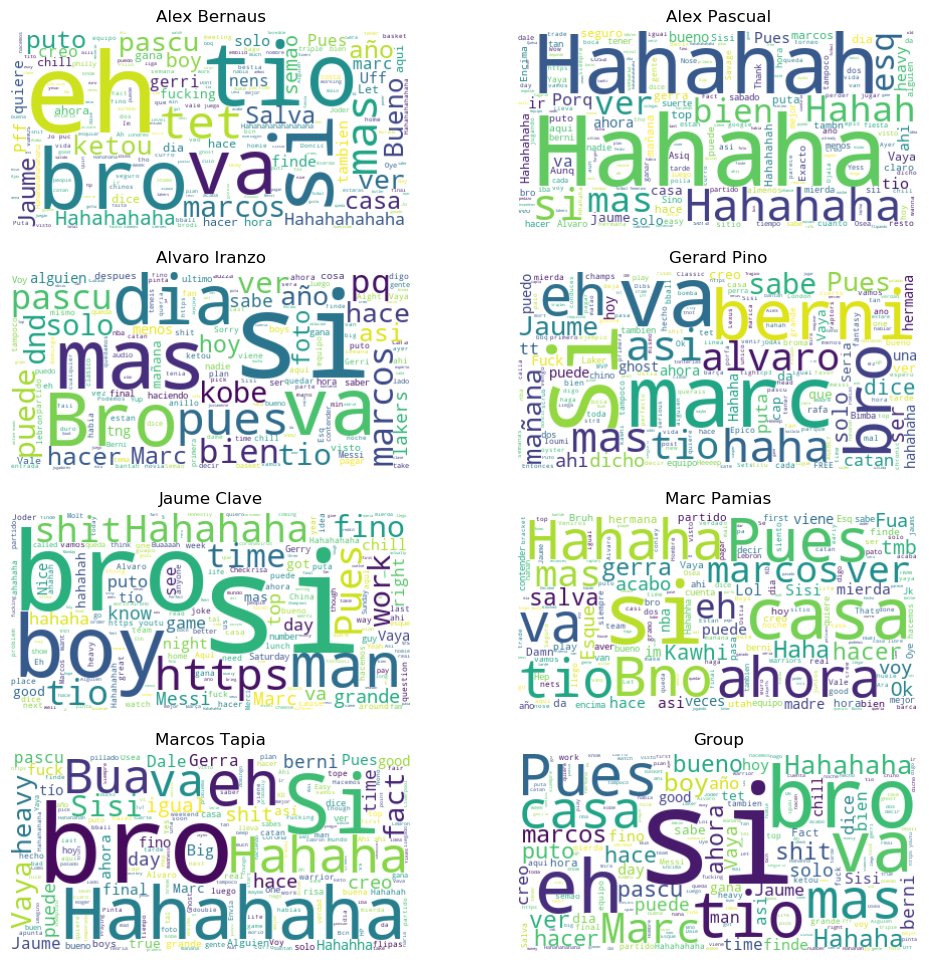

In [88]:
## Plotting all centrality measures 
# Plot the centrality of the nodes
from wordcloud import WordCloud

plt.figure(figsize = (12, 12))
# Degree Centrality
f, axarr = plt.subplots(4, 2, num = 1)

## Alex Bernaus
plt.sca(axarr[0, 0])
ab_wc = ' '.join(ab_filtered_words)
ab_wordcloud = WordCloud(background_color = "white").generate(ab_wc)
plt.imshow(ab_wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.margins(x = 0, y = 0)
axarr[0,0].set_title('Alex Bernaus', size = 12)

# Alex Pascual
plt.sca(axarr[0,1])
ap_wc = ' '.join(ap_filtered_words)
ap_wordcloud = WordCloud(background_color = "white").generate(ap_wc)
plt.imshow(ap_wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.margins(x = 0, y = 0)
axarr[0,1].set_title('Alex Pascual', size=12)

# Alvaro Iranzo
plt.sca(axarr[1,0])
ai_wc = ' '.join(ai_filtered_words)
ai_wordcloud = WordCloud(background_color = "white").generate(ai_wc)
plt.imshow(ai_wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.margins(x = 0, y = 0)
axarr[1,0].set_title('Alvaro Iranzo', size=12)

# Gerard Pino
plt.sca(axarr[1,1])
gp_wc = ' '.join(gp_filtered_words)
gp_wordcloud = WordCloud(background_color = "white").generate(gp_wc)
plt.imshow(gp_wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.margins(x = 0, y = 0)
axarr[1,1].set_title('Gerard Pino', size=12)

# Jaume Clave
plt.sca(axarr[2,0])
jc_wc = ' '.join(jc_filtered_words)
jc_wordcloud = WordCloud(background_color = "white").generate(jc_wc)
plt.imshow(jc_wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.margins(x = 0, y = 0)
axarr[2,0].set_title('Jaume Clave', size=12)

# Marc Pamias
plt.sca(axarr[2,1])
mp_wc = ' '.join(mp_filtered_words)
mp_wordcloud = WordCloud(background_color = "white").generate(mp_wc)
plt.imshow(mp_wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.margins(x = 0, y = 0)
axarr[2,1].set_title('Marc Pamias', size=12)

# Marcos Tapia
plt.sca(axarr[3,0])
mt_wc = ' '.join(mt_filtered_words)
mt_wordcloud = WordCloud(background_color = "white").generate(mt_wc)
plt.imshow(mt_wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.margins(x = 0, y = 0)
axarr[3,0].set_title('Marcos Tapia', size=12)

# Group
plt.sca(axarr[3,1])
all_wc = ' '.join(all_filtered_words)
all_wordcloud = WordCloud(background_color = "white").generate(all_wc)
plt.imshow(all_wordcloud, interpolation='bilinear')
plt.axis("off")
axarr[3,1].set_title('Group', size=12)

plt.show()

### Most Swear Words
A quick study will be done to determine the groups favorite swear words. The python library better_profanity will be used to as reference when looping through each English word in the chats history. This library is used to check for (and clean) profanity in strings.

Beautiful Soup is a library that makes it easy to scrape information from web pages. It sits atop an HTML or XML parser, providing Pythonic idioms for iterating, searching, and modifying the parse tree. This library will be used to scrape the Wikipedia page titled 'Spanish profanity'. This page contains a thorough list of swears in Spanish. All profanities on the page are __bolded__ and this HTML tag ('b') will be used parse the swears.

In [89]:
## Function to count english swears using profanity module
from better_profanity import profanity

profanity.contains_profanity('a$$')

def extract_swears_eng(df_col):
    swears = []
    for string in df_col:
        my_str = string.split()
        for each in my_str:
            each = each.lower()
            if profanity.contains_profanity(each) == True:
                swears.append(each.lower())
    return swears   

In [90]:
es_list = extract_swears_eng(messages_df['Content'])
swear_words_count = Counter(es_list)
es_list[:5]

['fuck', 'pussy', 'fucking', 'shit', 'ass']

In [91]:
## Beautifulsoup BS4
import requests
from bs4 import BeautifulSoup

r = requests.get('https://en.wikipedia.org/wiki/Spanish_profanity')
r.content
soup = BeautifulSoup(r.content, 'lxml')
spanish_swears = [tag.text.strip().replace(':',"") for tag in soup.find_all('b')]
spanish_swears[:5]

['chingar', 'txingartu', 'čingarár', 'chingón', 'follar']

In [92]:
## Remove wrongly classified bold (swear) terms
#print(len(spanish_swears), '\n')

for word in spanish_swears:
    if len(word) < 2:
        spanish_swears.remove(word)

In [93]:
## Capitalise / Loweracse all swears
capital_swears = []
lowercase_swears = []
all_caps_swears = []

for word in spanish_swears:
    capital_swears.append(word.title())
    lowercase_swears.append(word.lower())
    all_caps_swears.append(word.upper())

spanish_swears_f = capital_swears + lowercase_swears + all_caps_swears

In [94]:
## Capitalise / Loweracse all swears
capital_swears = []
lowercase_swears = []
all_caps_swears = []

for word in spanish_swears:
    capital_swears.append(word.title())
    lowercase_swears.append(word.lower())
    all_caps_swears.append(word.upper())

spanish_swears_f = capital_swears + lowercase_swears + all_caps_swears

In [95]:
## Find through all Spanish words
def extract_swears_spa(df_col):
    swears = []
    for sent in df_col:
        my_str = sent.split()
        for word in my_str:
            word = word.lower()
            if word in spanish_swears_f:
                swears.append(word)

    return swears

In [96]:
## Final swear DF
span_swears = extract_swears_spa(messages_df['Content'])
span_swears = [swear for swear in span_swears if len(swear) > 2]
swear_words_span_count = Counter(span_swears)

final_swear_counter = swear_words_count + swear_words_span_count
final_swear_df = pd.DataFrame.from_dict(final_swear_counter, orient = 'index').reset_index()
final_swear_df.columns = ['word', 'count']
final_swear_df = final_swear_df[~final_swear_df['word'].isin(['partido'])]

In [97]:
print('The most used swear words:')
final_swear_df.sort_values('count', ascending = False).head(10)

The most used swear words:


,word,count
3,shit,45
43,puto,41
40,puta,31
47,mierda,30
0,fuck,27
2,fucking,22
41,madre,18
50,pato,6
4,ass,5
9,damn,5


## Emojis
Emojis are ideograms and smileys used in electronic messages and web pages. To the user, an emoji is able to help display a feeling. This section will loop through every message sent and extract any emojis it finds. 

In [98]:
## Extract Emojis
def extract_emojis(df_col):
    emojis = []
    for string in df_col:
        my_str = str(string)
        for each in my_str:
            if any(char in emoji.UNICODE_EMOJI for char in each):
                emojis.append(each)
            
    return emojis

In [99]:
## Create emoji count data frame
from collections import defaultdict
from collections import Counter
emoji_list = extract_emojis(messages_df['Content'])

emoji_count = Counter(emoji_list)

emoji_df = pd.DataFrame.from_dict(emoji_count, orient = 'index').reset_index()
emoji_df.columns = ['emoji', 'count']
print('The top 10 most used emojis are:')
emoji_df.sort_values('count', ascending = False).head(10) 

The top 10 most used emojis are:


,emoji,count
0,😂,255
8,😭,41
1,💀,37
7,👻,33
19,🏼,30
6,🤣,27
30,🙏,25
10,🤙,22
15,❤,17
14,🏆,16


In [100]:
top10_emoji = emoji_df.sort_values('count', ascending = False).iloc[:10]
top10_emoji

,emoji,count
0,😂,255
8,😭,41
1,💀,37
7,👻,33
19,🏼,30
6,🤣,27
30,🙏,25
10,🤙,22
15,❤,17
14,🏆,16


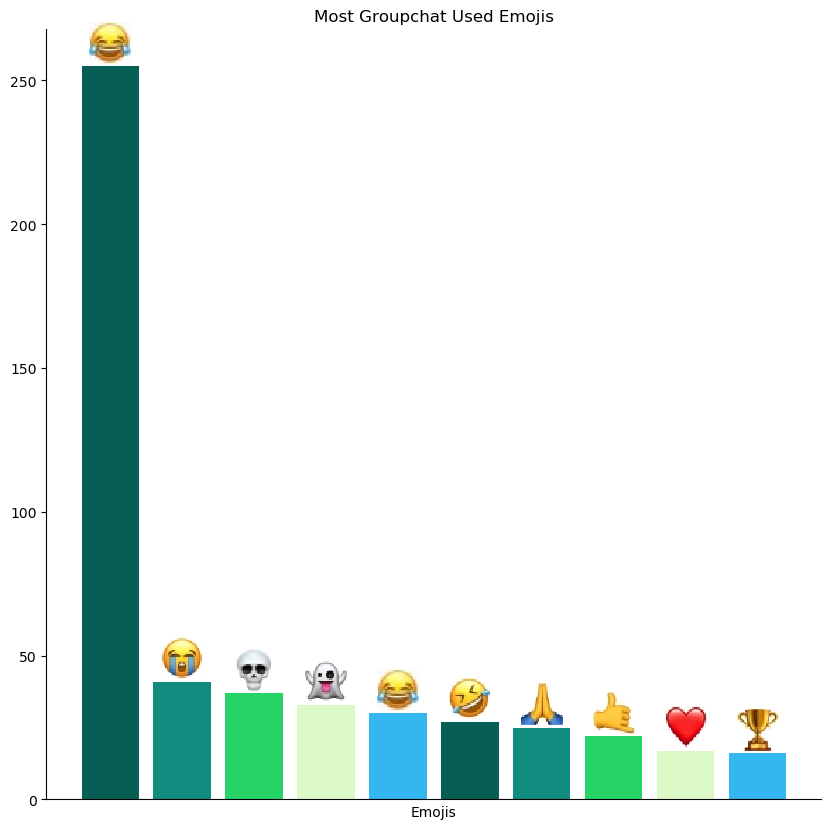

In [101]:
## Emoji plot
import image
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def getImage(path):
    return OffsetImage(plt.imread(path))

paths = [
    r'C:\Users\Jaume\Documents\emoji\face-with-tears-of-joy.jpg',
    r'C:\Users\Jaume\Documents\emoji\loudly-crying-face.jpg',
    r'C:\Users\Jaume\Documents\emoji\skull.jpg',
    r'C:\Users\Jaume\Documents\emoji\ghost.jpg',
    r'C:\Users\Jaume\Documents\emoji\face-with-tears-of-joy.jpg',
    r'C:\Users\Jaume\Documents\emoji\rolling-on-the-floor-laughing.jpg',
    r'C:\Users\Jaume\Documents\emoji\folded-hands.jpg',
    r'C:\Users\Jaume\Documents\emoji\call-me-hand.jpg',
    r'C:\Users\Jaume\Documents\emoji\red-heart.jpg',
    r'C:\Users\Jaume\Documents\emoji\trophy.jpg']

x = top10_emoji['emoji']
y = top10_emoji['count']

fig, ax = plt.subplots(figsize=(10,10))
ax.bar(top10_emoji['emoji'], top10_emoji['count'], color = ['#075E54', '#128C7E', '#25D366', '#DCF8C6', '#34B7F1']) 
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.xlabel('Emojis')
plt.title('Most Groupchat Used Emojis')
plt.xticks([])

for x0, y0, path in zip(x, y,paths):
    ab = AnnotationBbox(getImage(path), (x0, y0 +8), frameon=False)
    ax.add_artist(ab)

plt.show()

## Next Steps
The aim of this report was to find out interesting facts about a WhatsApp group chat. It developed further to contain daily message forecasting, message classification and sentiment analysis. The project is extensive but in no means exhaustive. There is a lot more that can be done with this dataset which will be developed in the future. 

Firstly, the forecast need to be improved. The ARIMA method is one of the many methods that might be utilized in a task like this. In order to have a better forecast, exponential smoothing may be applied, the croston method might also work and neural networks could provide the most accurate results. Of course, neural networks, along with the hope of improving the results from other methods requires much more data. This might be revisited in a couple years’ time where more patterns may be extracted from the texts. 

This paper has also ignored the media aspects involved with the WhatsApp group. It will be interesting to see who sends the most media rich files (images, videos, links, etc...) in relation to the amount of texts they send. Taking this further would require training a Convolutional Neural Network (CNN) to classify all images the group has sent. This would be interesting to see how texts just before and after relate to media that is sent. With a powerful CNN model, images could be classified and displayed when they are pictures of the group members. 

Ideally, this entire process could be repeated with any WhatsApp chat .txt file. This would require programming dynamic functions that could transform, manipulate and visualize the data in a way that is responsive to the chat member size and chat date history. This could then be turned into a tool with a frontend system and hosted so that people could receive a detailed report about their WhatsApp chat.

Thank you for reading!

## Further Reading
#### Exploratory Data Analysis (EDA)
https://en.wikipedia.org/wiki/Exploratory_data_analysis  
https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15

#### Time Series Forecasting
https://machinelearningmastery.com/time-series-forecasting/  
https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

#### Natural Language Processing
https://towardsdatascience.com/your-guide-to-natural-language-processing-nlp-48ea2511f6e1
https://en.wikipedia.org/wiki/Natural_language_processing

#### Text Classification 
https://monkeylearn.com/text-classification/
https://developers.google.com/machine-learning/guides/text-classification

#### Naive Bayes
https://scikit-learn.org/stable/modules/naive_bayes.html
https://en.wikipedia.org/wiki/Naive_Bayes_classifier